# Project description
We have been tasked with identifying patterns that determine whether a game succeeds or not. This should allow marketing teams to spot potential big winners and plan advertising campaigns.

To do this we have been given a dataset which contains user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales. The dataset contains many missing and errouneous error which must be explained and dealt with according to their nature.

We also need to create user profiles for each region of the dataset (North America, Europe, and Japan) - which will in essence reveal many of the patterns that lead to a games success

We will also test the hypothesis:
- Average user ratings of the Xbox One and PC platforms are the same
- Average user ratings for the Action and Sports genres are different. 

# Overall Conclusions

**Step 1. Data Investigation**

- year_of_release should be integer
- Critic score should be scaled to between 1-10 and thus remain a float for easier comparison with user score
- user_score should be converted from object to float
- NA values in discovered in name, genre, year_of_release, critic_score, user_score, rating
- To Be Decided (tbd) values in user_score needs to be explained and addressed
- Major skewness in year_of_release and sales columns need to be addressed

**Step 2. Explaining Missing Values**

User and Critic Scores
- Most consoles which don't have a review were released pre 2000 when the interest was not as we know it today. Thus any review for these console post 2000 like the ones we saw for DC (Dream Cast) would have been done in retrospect
- We will mostly likely be dropping data where the release year is less than say 2010 but regardless we will use whatever data we can to help impute accurate average missing reviews as the score are much the same until pre 1990

Rating
- Correlation between a games having a rating and its price/popularity with less sales for those who have no rating values
- A few of the games have only been released in 2016 and were probably upcoming during the scraping
- After investigation its seems that these games are some of the more underperforming titles with less than 150K USD in total sales
- I would propose that most likely the ratings are not present due to the aforementioned future release date of the game when the data was collected and also lack of popularity among some. 
- I would also propose that the data sourcing itself is the reason for so many  this type of NA would be especially prevalent as this dataset was scraped https://www.vgchartz.com/gamedb/

**Step 3. Preprocessing Data**

Release Year
- We salvaged 25 accurate release years by parsing the year from the title
- Dropped the rest the rest as its very little of the total data
- Converted column to integer as year_of_release is a discrete value in this dataframe

Total Sales
- Severely skewed and removed ~3000 outliers
- Note I investigated the averages across the years with both the outlier and trimmed datasets and the downward trend was reflected in both though more apparent now so I decided to proceed as its still an accurate representation of the current market

User and Critic Scores
- We investigated the skew of these columns to determine if we should trim them and did not remove outliers as lower scores could be important for later investigation and hypothesis testing
- We also investigated numerical and categorical correlations between these columns and the rest of the dataset in order to under how best to try and fill the NA and TBD values
- Interesting that critic score is now higher on average than user score and for the first time since 1998

User Score Fill
- Critic score, genre, and platform have the strongest effect on user score and we used the categorical features to create a groupby fill using mean

Critic Score Fill
- Total Sales, Genre, and Platform had the highest correlation to our scaled  Critic score and we used median for this groupby as the column has a slight left skew
- We managed to fill a lot of the values and we dropped the remaining na values which were also missing year of release values as they correspond to pre 2010 and pre widespread internet

Overall Note
- Given more time I would prefer to use a random forest to predict the rating based on critic score, platform, and rating but this will suffice for now
- We will also investigate how our filled dataset compares to the original at some points during later investigation
- I would prefer to use RFC to predict these ratings but I dont have the time and its beyond the scope of this stager of the course
- When averaged by year our new user score closely mirrors the old user score from which most of it was imputed which is why its not visible on the chart
- Still our new columns follow the same path though the peaks are slightly softer 

Final Thoughts On Scores Fill
- Our new column scores are around 0.5 lower on average however I'm satisfied they follow the same path particularly in more recent years

Ratings Fill
- We used only the highly correlated genres column to create a group by fill for these missing values as adding any additional feature created to many subgroups to fill the missing values appropriately 

**Step 4. Analyzing the data**

Purchase Count by Year/Platform
- A steady increase in purchase counts can be seen from 1995 but the most significant period is 2007-2011 
- The Nintendo DS account for over 1/3 of the market share during this sales boom and controlled over 50% of the market when the Wii sales counts are taken into account
- Worth noting that PS2 grossed the highest sales in both the original dataset and the trimmed version and upon review of the outlier dataset the Xbox and PS3 are some of the platforms negatively impacted by the removal sales outliers

Top Platform Sales Distribution
- We saw that 2012 was the worst year for all of the past giants of the gaming industry and by 2014 most sales are non existent
- Lets slice before and after 2014 to investigate past and present platforms and the average lifecycle of a platform
- We will also add a filter of at least 500 sales per console to ensure its not a one hit wonder in either pre or post 2014

Past Popular Platforms That Have Faded
- Average life of 13 years seems long lets check with some of the more popular platforms Xbox and Playstation
- I believe this is correct as we saw the fading and emerging of Playstation and Xbox consoles each in around 10-12 years
- Going forward to capture only the most relevant generation of consoles we will took data from 2010 but also remove PS2 so we only have at most 2 generation of the same platform in the dataset

Building a Prognosis for 2017
- Based on the graphs and lifetime figures above we should take from 2004 to capture the average lifetime however we could push it forward to capture the death of the second last generation and the emergence of the most recent generation of consoles in this dataset which would include PS4, Wii, etc...somewhere around 2010
- We plotted the lifestyles of the most popular platforms Playstation and Xbox and saw if 2010 captures the peak/dip of the previous generation and the emergence of the most recent

Global Sales by Platform
- The biggest difference is sales is between handheld and Home consoles with the PSV, PSP, DS, and 3DS having the lowest sales overall along with PC
- All distributions are right skewed with the all the platforms listed above severely skewed
- We can saw that PSV and PSP have strong variation in game price which could be partially the cause for sthere skews
- https://www.pricecharting.com/

**Step 5. 2017 Prognosis**
- To build a prognosis for 2017 we wil capture the release date of the current popular platform PS4 + 1 year so 2014

Global Sales by Platform
- Most platforms are highly right skewed with exception to Wii and Wiiu
- The Wii and WiiU have the highest average sales. However, while they do have the highest means and medians we cannot say they have the most potential in 2017 as we have captured very few samples in 2016 and their total sales are the lowest for that year indicating that they are fading. 
- There is not a significant difference in average sales (excluding Wii) between platforms
- There is a significant difference in total sales however with PS4 more than double its the competitor Xbox One which 
- PC, PSV, and 3DS also remain competitive with far higher purchase counts and total sales than all other platforms (excluding the afforemention PS4 and XOne)
- The PSV also has the highest outlier count which is pulling its mean and total sales higher
- Before proceeding we will drop the Wii as it only has two instances

Critic Score Sales Impact
- Moderate positive correlation of 0.34, however as pearsons corr and the graph is indicating a linear relationship albeit a diffuse one. 
- The relationship is not heteroscedastic however indicating an equal distance between points which are not overly concentrated in one area and not spreading out along an axis

User Score Sales Impact
- A similar story with user score though with a weaker positive correlation, in this case a slightly higher heteroscedasticity score is visible on the graph in that there is a tiger cluster of high scores with lower total sales than critic score and as a linear regression would be affected by and may not capture either the cluster correctly and/or the lower score outliers
- Critic score is a slightly more valuable of the two scores in terms of driving sales however its clear both scores have an effect on sales

Cross Platform Game Sales
- It's apparent that while critic score is correlated and we see greater sales with higher scores the platform itself is key to overall sales
- Seen when we sort by PS4's closest competitor Xbox One where those games have any purchase count cross platform the games consistently out sell on PS4
- Exclusivity of games available on limited platforms appears to be a significant competitive advantage

Games Sales by Genre
- Action genre has accounted for almost 1/3 of market share, being cheaper on average than its closest competitors may influence sales
- Role-Playing, Sport, and Shooter game are all very even in terms of count and market share around 1/2 that of Action
- The top 5 genres have a similar critic score however user scores for Role-Playing and Adventure games are more popular with users than the other top 5 genres, also with Adventure games also being cheaper they have a higher purchase count, than Role-Playing, Sport, and Shooter 
- Before we proceed lets drop the puzzle genre as it only has one instance

**Step 6. Regional Profiles**

Regional User Profiles
- North American Market Profile
    - Favors Xbox 360, Xbox One, WiiU, and PC platforms while handheld devices such as PSV and 3DS being the weakest performers
    - Favors Platform, Sport, and Shooter genres with Puzzle and Simulation being the weakest performers
    - Favor a more mature game experience than other markets with E10+ and M holding the highest market share for each rating across regions
 
- European Market
    - Favors PC, PS4, and Xbox 360, and Xbox One and like North America the handheld platforms underperform in this market
    - Racing, Simulation, and Strategy are the top genres while Role Playing, Misc, and Fighting are the weakest performer
    - A broader range in ratings can be seen with M and E being the most popular ratings
- Japanese Market
    - Handheld devices are the most popular in the Japanese Market with the PSV and 3DS being the most popular
    - Role-Playing, Misc, and Adventure are the most popular genres in Japan with Shooter, Platform, and Sport being the weakest performers
    - More accessible games are the most popular in Japan with T and E being the most popular ratings

**Step 7. Testing Hypothesis**

Average user ratings of the Xbox One and PC platforms are the same
- Slight differences between distributions with Xbox One having a much more normal distribution versus PC's long tail indicating a left skew
- While the difference is clear we cannot reject the null hypothesis as this sample distribution is highly likely to have occurred through random chance and this outcome is not repeatable/unlikely to occur from another sample

Average user ratings for the Action and Sports genres are different. 
- We see a statistically significant difference between the user ratings of Action and Sport with Action being rated higher
- With the p-value being lower than our alpha threshold we can reject the null hypothesis



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

# Step 1. General Information

In [6]:
df = pd.read_csv("datasets/games.csv")
df.columns = df.columns.str.lower()

In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
pd.DataFrame({'Count': df.count(),
              '% Missing': round(df.isnull().sum() / len(df) * 100, 2),
              "Unique": df.nunique(),
              'Type':df.dtypes})

,Count,% Missing,Unique,Type
name,16713,0.01,11559,object
platform,16715,0.00,31,object
year_of_release,16446,1.61,37,float64
genre,16713,0.01,12,object
na_sales,16715,0.00,402,float64
eu_sales,16715,0.00,307,float64
jp_sales,16715,0.00,244,float64
other_sales,16715,0.00,155,float64
critic_score,8137,51.32,82,float64
user_score,10014,40.09,96,object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
round(df.isna().sum() / len(df), 4)

name               0.0001
platform           0.0000
year_of_release    0.0161
genre              0.0001
na_sales           0.0000
eu_sales           0.0000
jp_sales           0.0000
other_sales        0.0000
critic_score       0.5132
user_score         0.4009
rating             0.4048
dtype: float64

In [12]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [13]:
for col in df.select_dtypes(include='object'):
    print(col)
    print(df[col].unique())

name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
user_score
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' 

### Conclusion
- year_of_release integer
- Critic score should be scaled to between 1-10 and thus remain a float for easier comparison with user score
- user_score should be converted from object to float
- Some na values in name, genre, year_of_release 
- Many na values in critic_score, user_score, rating - could be imputed depending on correlations and distributions
- To Be Decided (tbd) values in user_score needs to be explained and dealt with accordingly
- Major skewness in year_of_release and sales columns 
- Critic and user scores are on different scales but we can convert them for plotting compairson

Once datatypes are changed we will have:
- 3 nominal categorical columns (name, genre, platform)
- 1 Ordinal categorical columns (rating)
- 6 continuous numeric columns (year_of_release, na_sales, eu_sales, jp_sales, other_sales, user_score)
- 2 discrete numeric column (year_of_release, critic_score)
- Name and Genre columns missing 2 values 

## Missing Data Investigation
- Investigating missing data in user and critic scores columns as well as rating column
- We'll look at TBD at a later stage

In [14]:
no_tbd = df[df['user_score'] != 'tbd']

### User Score Missing Data

In [15]:
print(list(no_tbd[no_tbd['user_score'].notnull()]['platform'].unique()))


['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC', 'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC']


In [16]:
print(list(no_tbd[no_tbd['user_score'].isna()]['platform'].unique()))

['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360', 'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP', 'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']


### Critic Score Missing Data

In [17]:
print(list(df[df['critic_score'].notnull()]['platform'].unique()))

['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC', 'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC']


In [18]:
print(list(df[df['critic_score'].isna()]['platform'].unique()))

['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360', 'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP', 'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']


### Conclusion
- Clearly we can see that most consoles which dont have a review are dated pre 2000 when the interest was not as we know it today
- Any review for these consolse post 2000 like the ones we see for DC would have been done in retrospect
- We will mostly likely be dropping data where the release year is less than say 2010 but regardless we will use whatever data we can to help impute accurate average missing reviews from recent times

### Rating Column Missing Data

In [19]:
df['total_sales'] = df.loc[:, 'na_sales':'other_sales'].sum(axis=1)

In [20]:
print(list(df[df['rating'].isna()]['platform'].unique()))

['NES', 'GB', 'DS', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'X360', 'Wii', '2600', 'PS', 'XOne', 'GC', 'PS3', 'GEN', 'PC', 'PSP', 'WiiU', 'PS2', 'XB', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']


In [21]:
print(list(df[df['rating'].notnull()]['platform'].unique()))

['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC', 'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC']


In [22]:
print(df[df['rating'].isna()]['total_sales'].agg(['min', 'median', 'mean', 'max']))

min        0.000000
median     0.110000
mean       0.421125
max       40.240000
Name: total_sales, dtype: float64


In [23]:
print(df[df['rating'].notnull()]['total_sales'].agg(['min', 'median', 'mean', 'max']))

min        0.010000
median     0.210000
mean       0.609748
max       82.540000
Name: total_sales, dtype: float64


- Definitly appears to be a correlation between a games having a rating and its price/popularity with less sales for those who have no rating values
- Perhaps some of the game were not yet released at the time of that this data was collected

In [24]:
print('Numer of na ratings with 0 sales in Japan:', df[df['jp_sales'] == 0]['rating'].isna().sum())
print('Numer of na ratings with 0 sales in NA:', df[df['na_sales'] == 0]['rating'].isna().sum())
print('Numer of na ratings with 0 sales in EU:', df[df['eu_sales'] == 0]['rating'].isna().sum())
print('Numer of na ratings with 0 sales in EU:', df[df['total_sales'] == 0]['rating'].isna().sum())

Numer of na ratings with 0 sales in Japan: 2768
Numer of na ratings with 0 sales in NA: 3732
Numer of na ratings with 0 sales in EU: 3737
Numer of na ratings with 0 sales in EU: 2


- There may some correlation in sales - some of those ~700 games which have sold in Japan that have not sold not NA and EU

In [25]:
df[(df['rating'].notnull()) & (df['jp_sales'] > 0)]['year_of_release'].agg(['min', 'max'])

min    1994.0
max    2016.0
Name: year_of_release, dtype: float64

In [26]:
# print(df[df['rating'].notnull()]['genre'].value_counts())
# print(df[df['rating'].isna()]['genre'].value_counts())

- Interestng, I had hypthesised that the reason for some NA rating values was an inconsistency between game rating systems, but despite Japans game rating organisation CERO starting in 2002 games have clearly been sold in Japan using the North American ERSB system which was established in 1994
- Note, I investiged genres but there is no evidence to suggest that say misc or puzzle genre games are exempt from rating
- Another hypothesis is that ratings are not internationally usniversal i.e. a T rating game may be rated higher or lower in each market therefore no one rating can be placed in this datsets rating column

### Conclusion
- I would propose that most likely the ratings are not present is due to the afforementioned future release date of the game when the data was collected and also the data sourcing itself as this type of NA would be espcially prevelant as this dataset was scraped https://www.vgchartz.com/gamedb/

## Investigating 'tbd' Values

In [27]:
df[df['user_score'] == 'tbd'].describe().round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,2376.00,2424.00,2424.00,2424.00,2424.00,1082.00,2424.00
mean,2007.45,0.13,0.04,0.00,0.02,60.71,0.19
std,3.48,0.18,0.11,0.03,0.04,11.19,0.29
min,1997.00,0.00,0.00,0.00,0.00,23.00,0.01
25%,2005.00,0.03,0.00,0.00,0.00,54.00,0.05
50%,2008.00,0.08,0.01,0.00,0.01,62.00,0.11
75%,2010.00,0.15,0.04,0.00,0.02,69.00,0.22
max,2016.00,3.45,2.59,0.86,1.09,90.00,6.70


In [28]:
df[df['user_score'] == 'tbd']['genre'].unique()

array(['Sports', 'Misc', 'Adventure', 'Simulation', 'Action', 'Puzzle',
       'Platform', 'Racing', 'Fighting', 'Role-Playing', 'Shooter',
       'Strategy'], dtype=object)

In [29]:
df[df['user_score'] == 'tbd']['platform'].unique()

array(['Wii', 'PS2', 'GBA', 'PC', 'DS', 'PS', 'XB', 'X360', 'PS3', 'GC',
       'PSP', '3DS', 'WiiU', 'XOne', 'PSV', 'PS4'], dtype=object)

In [30]:
np.random.choice(df[df['user_score'] == 'tbd']['name'].unique(), 20)

array(['The Cheetah Girls: Pop Star Sensations', 'Spy Hunter 2',
       'Just Dance 2016', 'Amazing Adventures: The Forgotten Ruins',
       'ESPN Final Round Golf 2002', 'Hysteria Hospital: Emergency Ward',
       'NFL Blitz 20-02', 'Whac-A-Mole', 'Jewel Master: Cradle of Rome',
       'Monster Jam', 'Guitar Hero: Van Halen', 'Imagine: Teacher',
       'EyePet', 'Montessori Music', 'Hasbro Family Game Night Fun Pack',
       'Air Traffic Chaos', 'Imagine: Teacher Class Trip',
       'Just Dance: Summer Party', 'X-Men: Reign of Apocalypse',
       'Diner Dash: Flo on the Go'], dtype=object)

In [31]:
len(df[(df['user_score'] == 'tbd') & (df['year_of_release'] == 2016)])

34

In [32]:
len(df[df['user_score'] == 'tbd'])

2424

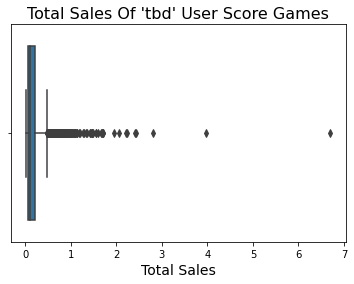

In [33]:
sns.boxplot(df[df['user_score'] == 'tbd']['total_sales'])
plt.title("Total Sales Of 'tbd' User Score Games", fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.show()

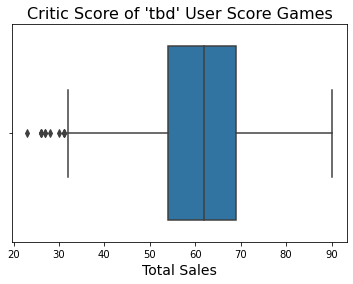

In [34]:
sns.boxplot(df[df['user_score'] == 'tbd']['critic_score'])
plt.title("Critic Score of 'tbd' User Score Games", fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.show()

### Conclusion
- After investighation its seems that these games are some of the more underperforming titles with less than 150K USD in total sales
- In a few of the games have only been released in 2016 and were probably upcoming during the scraping

# Step 2. Preprocessing
Replace the column names (make them lowercase).

### Duplicates

In [35]:
df[df.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


### Name and Genre

In [36]:
# df[df['name'].isna()]
# df[df['genre'].isna()]
df = df[df['name'].notnull()]

- Dropped those two entries with missing name and genre
- Let's try and salavage a few release years

### Investigating Year of Release 
- After a brief investigation I saw that some games have a year in the title
- Also most games with a year in the title are released the year before (e.g. FIFA 17 released in 2016)
- Parsing out years from titles names where the year of release is NA

In [37]:
import re
# df['year_of_release'].value_counts()
# df[df['name'].str.contains('99')]

pattern = '20\d\d|0[1-9]|20|99|11'
print('Number of NA Values In year_of_released Column:', df['year_of_release'].isna().sum())
print('Number of Names Which Feature A Year In The Title:',
      df[df['year_of_release'].isna()]['name'].str.contains(pattern).sum())

mask = df['year_of_release'].isnull() 
df.loc[mask, 'year_of_release'] = df[df['year_of_release'].isna()]['name'].str.findall(pattern).str.join('')


Number of NA Values In year_of_released Column: 269
Number of Names Which Feature A Year In The Title: 25


In [38]:
df.loc[df['year_of_release'] == '99', 'year_of_release'] = 1998
df.loc[df['year_of_release'] == '06', 'year_of_release'] = 2015
df.loc[df['year_of_release'] == '07', 'year_of_release'] = 2016
df.loc[df['year_of_release'] == '11', 'year_of_release'] = 2010
df.loc[df['year_of_release'] == '20', 'year_of_release'] = 1999


# df[df['year_of_release'] == '']['total_sales'].hist()
print('Perc of empty year_of_release values remaining: {:.2%}'.format(
    len(df[df['year_of_release'] == '']) / len(df)))

df = df[df['year_of_release'] != '']
df['year_of_release'] = df['year_of_release'].astype(int)
df = df[df['year_of_release'].notnull()]

Perc of empty year_of_release values remaining: 1.46%


### Conclusion
- In the end we salvaged 25 accurate release years with this technuique 
- Dropped the rest the rest as its very little of the total data
- Converted column to integer as year_of_release is a discrete value in this dataframe

## Investigating Total Sales
- Let's look at some distributions of Total Sales this will help educate on which years to remove from the dataset at a later stage
- First we need a distribution plot function

### Total Sales Distribution

In [39]:
def dist_plots(df, col, trigger):
    plt.subplots(2,2,figsize=(15,6))
    
    plt.subplot(1,3,1)
    sns.histplot(df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel(ylabel='Count', fontsize=14)
    plt.xlabel(col+'Hist')
    if trigger:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      plt.axvline(ymin=0, ymax=1, x=(Q3 - 1.5 * IQR), color='red')
      plt.text((Q3 - 1.5 * IQR) + (Q3 - 1.5 * IQR) / 10 , 1200, '1.5 * IQR', color='red')

    print()
    plt.subplot(1,3,2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.ylabel(col)
    plt.xlabel(col+"Probplot")
 
    plt.subplot(1,3,3)
    sns.boxplot(y = df[col])
    plt.ylabel(col)
    plt.xlabel(col+"Boxplot")
    
    
    # plt.subplots_adjust(hspace=0.3)
    print(col+'Skewness:', df[col].skew())
    plt.show()


total_salesSkewness: 17.286034567541183


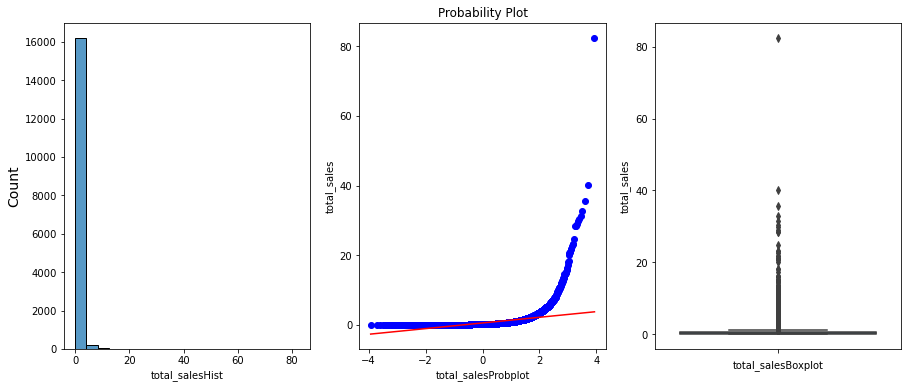

In [40]:
dist_plots(df, 'total_sales', False)

### Removing Outliers

In [41]:
print('Number of Totle Sales outliers:', len(df[df['total_sales'] > 0.5]))
outliers = df
df = df[df['total_sales'] < 0.55]

Number of Totle Sales outliers: 3892



total_salesSkewness: 1.0323076169303482


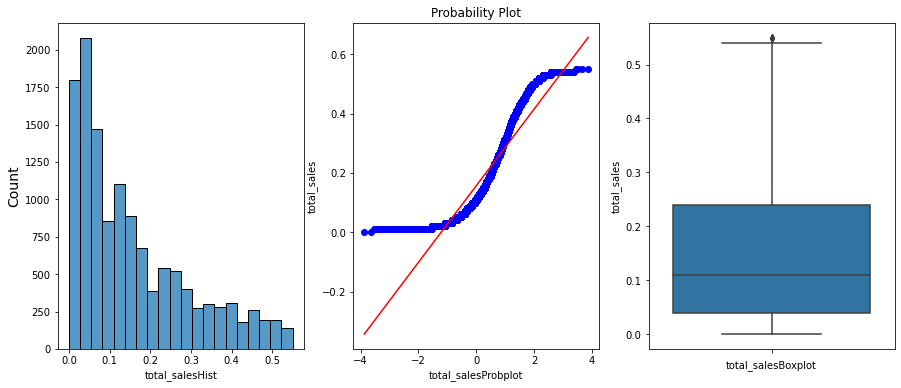

In [42]:
dist_plots(df, 'total_sales', False)

### Average Sales by Platform

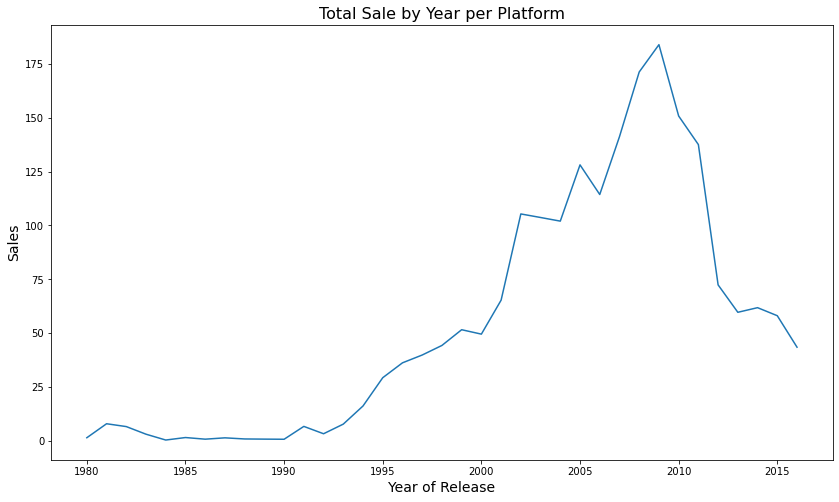

In [43]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year_of_release', y='total_sales',
             estimator=np.sum, ci=None)
plt.title('Total Sale by Year per Platform', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()

### Average Sales by Year

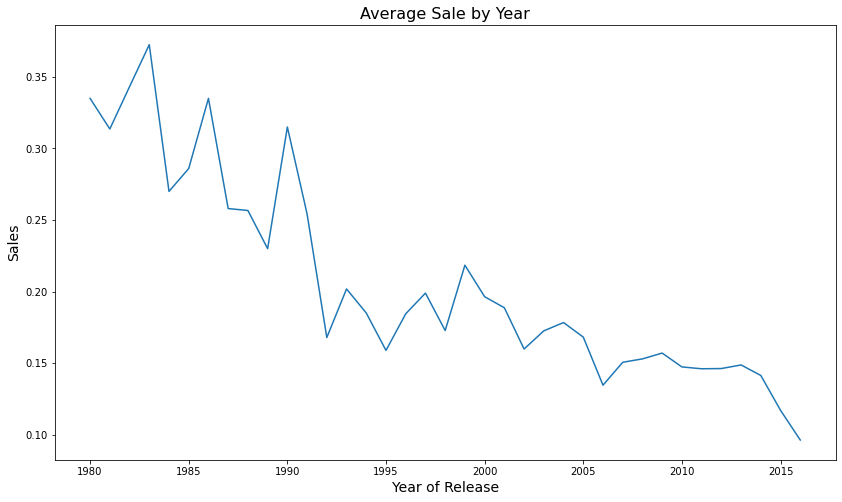

In [44]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year_of_release', y='total_sales', 
             estimator=np.mean, ci=None)
plt.title('Average Sale by Year', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()

### Average Sales by Genre

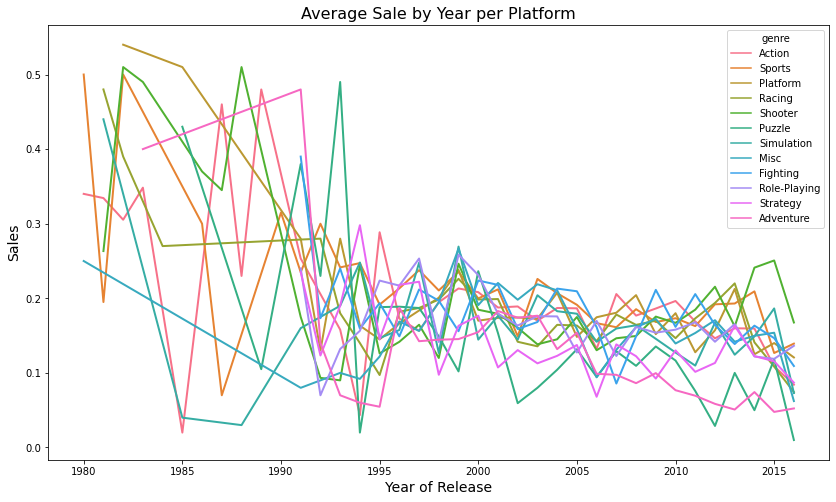

In [45]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year_of_release', y='total_sales', hue='genre',
             estimator=np.mean, ci=None, linewidth=2)
plt.title('Average Sale by Year per Platform', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()

## Conclusion
- Severely skewed and removed ~3000 outliers
- A downward trend in total sales begins around 2009-2010 and average sales start to dip in 2013
- Some genres are suffering more than others (Adventure/Puzzle)
- For the forecast we can remove data somewhere around pre 2010-2013 when we get to that at a later stage
- Note I investigated the averages across the years with both datasets and the downward trend was reflected in both though more apparent now so I decided to proceed as its still an accurate representation of the current market


## Investigating User and Critic Score Correlation
- Using a joint scatter/hist with kde for overall correlation
- Then a lineplot to track score correlation over the years
- We first need to remove the 'tbd' values from the user_score column for plotting
- I am also scaling down critic score to match user_score

In [46]:
df['user_score_clean'] = pd.to_numeric(df['user_score'], errors='coerce')

In [47]:
df['critic_score_scaled'] = round(df['critic_score'].apply(lambda x: x / 10),1)

In [48]:
def jplot(df, col_a, col_b):

    model = ols(formula=col_a+'~'+col_b, data=df).fit()
    wLM_Stat, wLM_p, wF_Stat, wF_p = het_white(model.resid, model.model.exog)
    bpLM_Stat, bpLM_p, bpF_Stat, bpF_p = het_breuschpagan(model.resid, model.model.exog)

    textstr = 'Pearson Corr:\n'+col_b+' to '+col_a+':\n'+str(df[col_b].corr(df[col_a]).round(3))+'\n\n'
    
    textstr += "Heteroscedasticity:\nWhite Test:'\n"
    textstr += 'F = '+str(round(wF_Stat,3))+', p = '+str(round(wF_p,3))+'\n'
    textstr += 'BP Test:\n'+'F = '+str(round(bpF_Stat,3))+', p = '+str(round(bpF_p,3))

    viz = sns.jointplot(x=col_a, y=col_b, marker="+", s=100, data=df, height=8, ratio=6, marginal_kws=dict(fill=False))
    viz.plot_joint(sns.kdeplot, color="r", zorder=1, levels=5)
    viz.ax_marg_x.set_xlim(df[col_a].min()-5, df[col_a].max()+1)
    text = viz.fig.suptitle(col_a+' Price to '+col_b+' Relationship', fontsize=16, position=(0.5,1.1))


    plt.text(.97, 0.5, textstr, fontsize=12, transform=plt.gcf().transFigure)
    plt.show()

### Jointplot

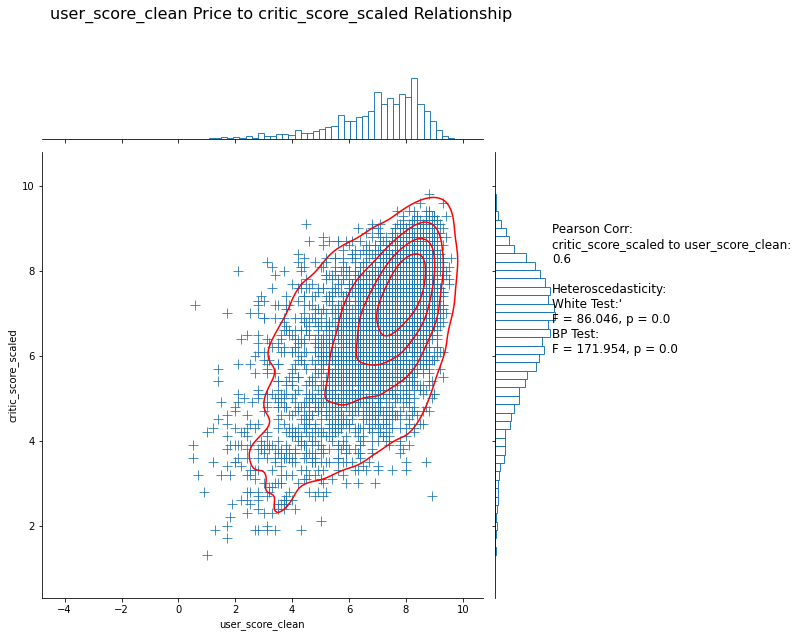

In [49]:
jplot(df, 'user_score_clean', 'critic_score_scaled')

### Lineplot

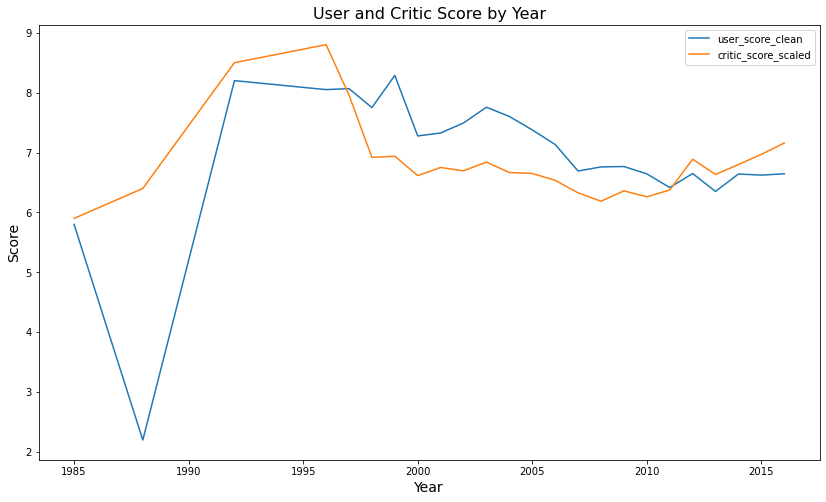

In [50]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year_of_release', y='user_score_clean', estimator=np.mean, ci=None)
sns.lineplot(data=df, x='year_of_release', y='critic_score_scaled', estimator=np.mean, ci=None)
plt.legend(['user_score_clean', 'critic_score_scaled'])
plt.title('User and Critic Score by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.show()

## Conclusion
- We can see spikes in the 80's and early 90s dues to justa few games being review
- However the more reviews became widespread the more smoother the lines/yearly averages become
- Interesting that critic score is niow higher on average than user score and for the first time since 1998


## Investigating User Score
- We will investigate distributions, correlations, and effect sizes of several features on user score 
- Then we will attempt to fill with groupby means and drop any remaining NA rows
- First lets define some correlation and distribution functions

In [51]:
def correlation_ratio(categories, values):
    cat = np.unique(categories, return_inverse=True)[1]
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for i in np.unique(cat):
        subgroup = values[np.argwhere(cat == i).flatten()]
        ssw += np.sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2

    coef = (ssb / (ssb + ssw))**.5


    print('Eta_squared: {:.4f}\nEta: {:.4f}'.format(coef**2, coef))

In [52]:
def anova_plots(df, cat_col, num_col, rot): 
    new_df = df.dropna()
    labels = df[cat_col].unique()
    anovas = []
    
    for label in labels:
        if len(new_df[new_df[cat_col] == label][num_col]) > 0:
            anovas.append(new_df[new_df[cat_col] == label][num_col])
    f, p = stats.f_oneway(*anovas)
    print(f'ANOVA Test \nF-Stat: {f.round(3)}\np-value: {p.round(3)}\n')
    
    
    print('Correlation Ratio')
    correlation_ratio(new_df[cat_col], new_df[num_col])
    
    grp_order = new_df.groupby(cat_col,sort=False)[num_col].agg('mean').sort_values(ascending=False).index
    plt.figure(figsize=(12, 6))
    sns.barplot(x=new_df[cat_col],y=new_df[num_col], order=grp_order, estimator=np.mean, capsize=0.2, palette="Blues_d")
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12, rotation=rot) 
    plt.xlabel(cat_col, fontsize=14)
    plt.ylabel(num_col, fontsize=14) 
    plt.title("Mean "+num_col+" by "+cat_col+" (EOM)")
    plt.show()
    

In [53]:
def var_ratio(cat_col, num_col):
    ratio = df.groupby(cat_col)[num_col].std().max() / df.groupby(cat_col)[num_col].std().min()
    print('STD Ratio:\n', round(ratio,2), '\n')

### User Score Distribution


user_score_cleanSkewness: -1.1861584877561522


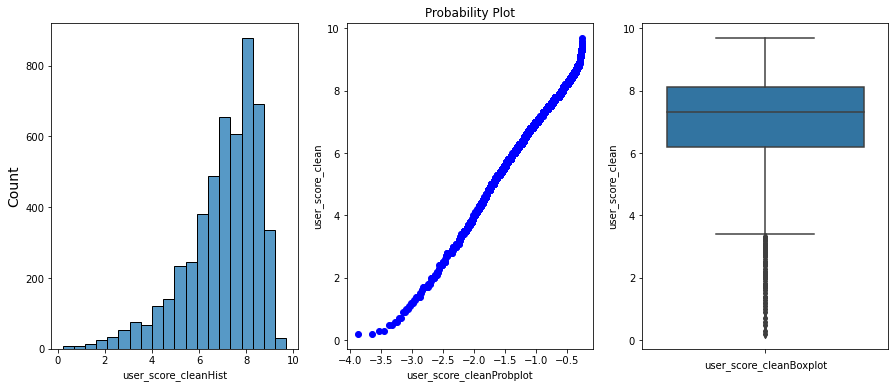

In [54]:
dist_plots(df, 'user_score_clean', False)

### Conclusion
- The skew is not very severe and we can see that despite the hist and boxplot highlighting the slight left skew the prob plot remains relatively straight
- Not removing outliers here as lower scores may tell us something about total sales etc...
- It will also help to create more appropriate groupby means

### Numeric Correlations

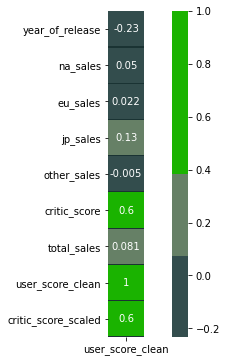

In [55]:
plt.figure(figsize=(10,6))
y_colors=[(0.2,0.3,0.3),(0.4,0.5,0.4),(0.1,0.7,0),(0.1,0.7,0)]

sns.heatmap(df.corr().iloc[:, -2:-1], cmap=y_colors, square=True, linewidth=0.1, linecolor=(0.1,0.2,0.2), annot=True)
plt.show()


### Conclusion 
- As we saw above the user and critic scores have a moderate linear correlation with slight diffusion at lower scores
- Japan sales has a weak correlation, however sales is not an ideal feature for grouping unless we categorize sale
- Lets look at the datsets existing categorical featrures first using ANOVA test

### Categorical Correlations

ETA Squared https://www.spss-tutorials.com/effect-size/

STD Ratio:
 1.56 

ANOVA Test 
F-Stat: 7.068
p-value: 0.0

Correlation Ratio
Eta_squared: 0.0168
Eta: 0.1294


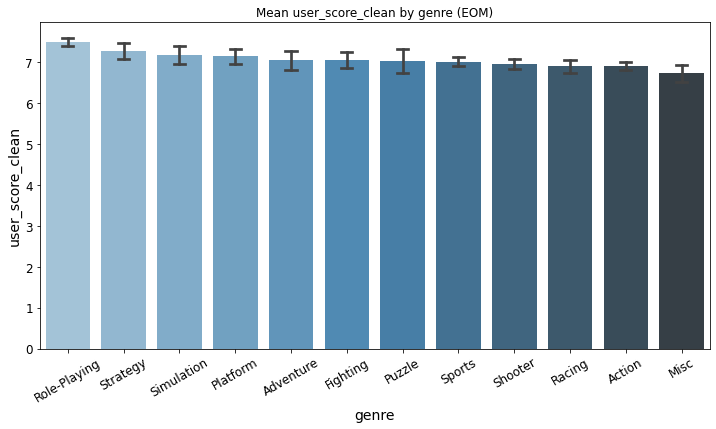

In [56]:
var_ratio('genre', 'user_score_clean')
anova_plots(df, 'genre', 'user_score_clean', 30)

STD Ratio:
 3.32 

ANOVA Test 
F-Stat: 23.274
p-value: 0.0

Correlation Ratio
Eta_squared: 0.0755
Eta: 0.2748


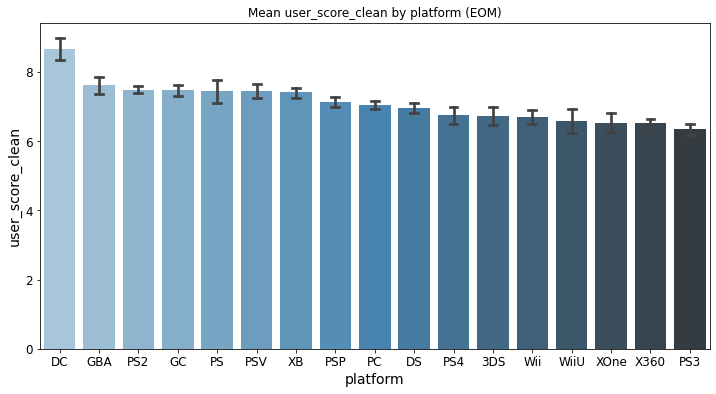

In [57]:
var_ratio('platform', 'user_score_clean')

anova_plots(df, 'platform', 'user_score_clean', 0)

In [58]:
df['rating'].value_counts()

E       2987
T       2193
E10+    1081
M        977
EC         8
RP         1
K-A        1
Name: rating, dtype: int64

STD Ratio:
 1.17 

ANOVA Test 
F-Stat: 12.915
p-value: 0.0

Correlation Ratio
Eta_squared: 0.0084
Eta: 0.0917


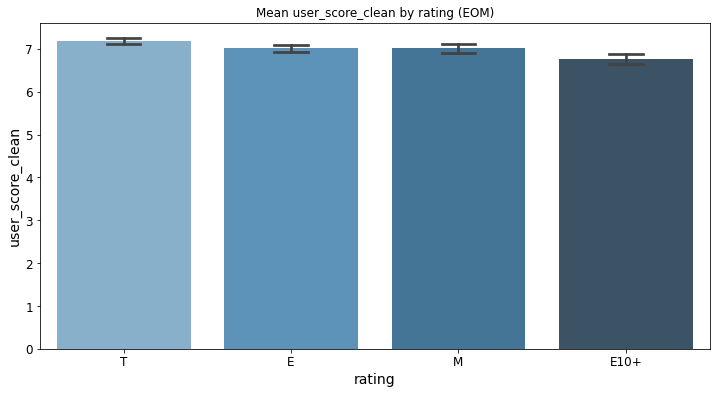

In [59]:
df = df[(df['rating']!= 'RP') & (df['rating']!= 'K-A') & (df['rating']!= 'EC')]

var_ratio('rating', 'user_score_clean')
anova_plots(df, 'rating', 'user_score_clean', 0)

### Conclusion
- Very weak correlation ratios and effect sizes however platform and genre appear to be the most useable features for a groupby
- Dropped the three ratings with <10 values

## Investigating Critic Score Scaled
- Same process as before, we will investigate correlations and effect size of several features on critic score and attempt to fill with groupby means
- Note vairance of platforms here is too high fior ANOVA need to address this

### Critic Score Distribution


critic_score_scaledSkewness: -0.5798754993038137


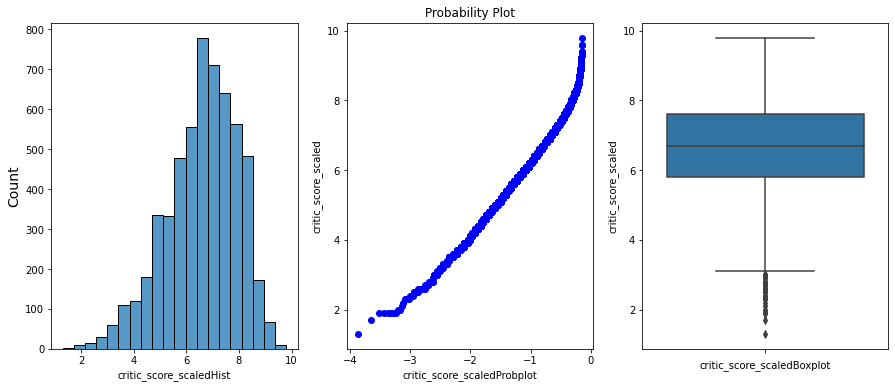

In [60]:
dist_plots(df, 'critic_score_scaled', False)

### Numeric Correlations

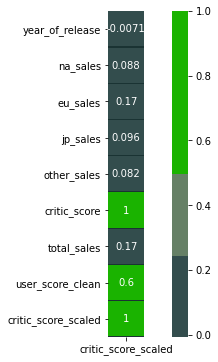

In [61]:
plt.figure(figsize=(10,6))
y_colors=[(0.2,0.3,0.3),(0.4,0.5,0.4),(0.1,0.7,0),(0.1,0.7,0)]

sns.heatmap(df.corr().iloc[:, -1:], cmap=y_colors, square=True, linewidth=0.1, linecolor=(0.1,0.2,0.2), annot=True)
plt.show()

### Conclusion
- Slight left skewed feature not too severe no need to consider trimming outliers
- Much higher correlation between critic score a total sales
- Correlation between user and critic scores remains at 0.58 after our impuation of over 8000 user scores

### Categorical Correlations

STD Ratio:
 1.28 

ANOVA Test 
F-Stat: 16.136
p-value: 0.0

Correlation Ratio
Eta_squared: 0.0374
Eta: 0.1935


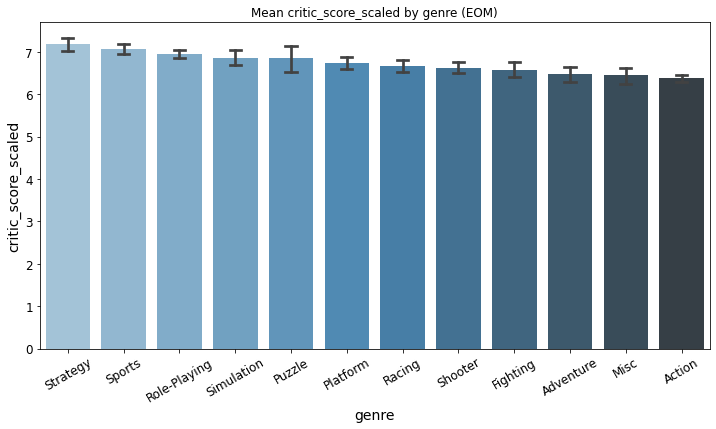

In [62]:
var_ratio('genre', 'critic_score_scaled')
anova_plots(df, 'genre', 'critic_score_scaled', 30)

STD Ratio:
 2.8 

ANOVA Test 
F-Stat: 28.388
p-value: 0.0

Correlation Ratio
Eta_squared: 0.0906
Eta: 0.3011


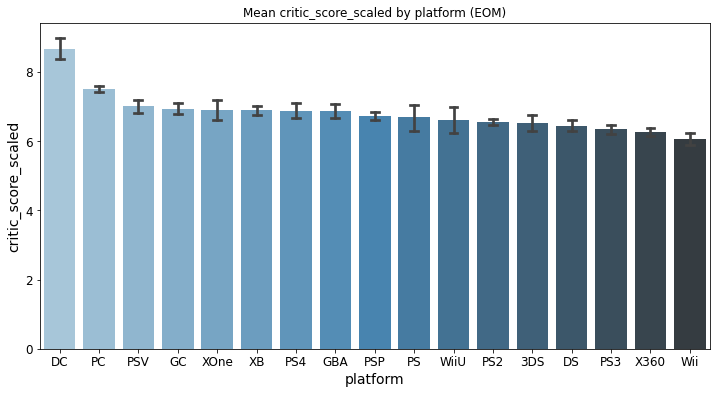

In [63]:
var_ratio('platform', 'critic_score_scaled')
anova_plots(df, 'platform', 'critic_score_scaled', 0)

STD Ratio:
 1.1 

ANOVA Test 
F-Stat: 3.454
p-value: 0.016

Correlation Ratio
Eta_squared: 0.0023
Eta: 0.0476


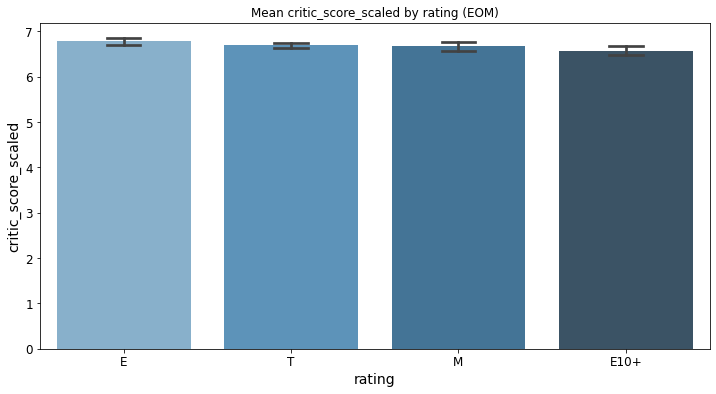

In [64]:
var_ratio('rating', 'critic_score_scaled')
anova_plots(df, 'rating', 'critic_score_scaled', 0)

### Conclusion
- Platform is has the strongest effect on critic score among the categorical features

## Filling User Score
- We will use a two step approch here
    - We will use the highly correlated critic score to replace the tbd values
    - Then we will use the categorical features platform and rating to fill the na values
- Before filling the original dataet lets keep a copy to compare the yearsly averages against each other

In [65]:
old_df = df

In [66]:
missing = pd.to_numeric(df['user_score_clean'], errors='coerce').isna().sum()

In [67]:
print('Number of Missing and Erronrous Values To Be Filled:', missing)

# Fill TBD
df['user_score_clean'] = np.where(
    df['user_score'].eq('tbd'),
    df.groupby('critic_score_scaled',sort=False)['user_score_clean']
    .transform('median'), 
    df['user_score_clean']
    )

# Use platform and genre to fill na
df['user_score_clean'] = df.groupby(
    ['platform', 'genre'], sort=False)['user_score_clean'].transform(
    lambda x: x.fillna(x.round().median())
)
print('Total Number of Missing / Errouneuous Values Filled:', (missing -
    len(df[df['user_score_clean'].isna()])))

print('Remaining Missing Values:', len(df[df['user_score_clean'].isnull()]))

Number of Missing and Erronrous Values To Be Filled: 7735
Total Number of Missing / Errouneuous Values Filled: 7001
Remaining Missing Values: 734


In [68]:
# df[(df['user_score_clean'].isna())&(df['year_of_release'] > 2010)]
df = df[df['user_score_clean'].notnull()]

In [69]:
df.drop('user_score', axis=1, inplace=True)

## Conclusion
- Used median for this groupby as the column has a slight left skew
- We managed to fill a lot of the values however we used genre in place of rating due to a length mismatch in the groupby
- We dropped the remaining na values which were missing year of release values as they correspnded to pre 2010 and pre widespread internet
    - Given more time I would prefer to use a random forest to predict the rating based on critic score, platform, and rating but this will suffice for now
    - We will also investigate how our filled dataset compares to the original dataset with all of its NA values dropped as an appendix

## Filling Critic Score
- Similar to user score we will take a two step approch here filling what we can from total_sales and platform
- Thaks to this we can use user score to fill some more values without getting a length mismatch from the groupby

In [70]:
missing_critic = len(df[df['critic_score_scaled'].isna()])

In [71]:
print('Number of Missing Values To Be Filled:', missing_critic)

df['critic_score_scaled'] = df.groupby(
    ['total_sales', 'platform'],sort=False)['critic_score_scaled'].transform(
    lambda x: x.fillna(x.round().mean())
)

print('Fill One - Total Number of Missing Values Filled:', (missing_critic -
    len(df[df['critic_score_scaled'].isnull()])))

missing_critic = len(df[df['critic_score_scaled'].isna()])

df['critic_score_scaled'] = df.groupby(
    'user_score_clean', sort=False)['critic_score_scaled'].transform(
    lambda x: x.fillna(x.round().mean())
)

print('Fill Two - Total Number of Missing Values Filled:', (missing_critic -
    len(df[df['critic_score_scaled'].isnull()])))

# df[df['critic_score_scaled'].isna()]
print('Remaining Missing Values:', len(df[df['critic_score_scaled'].isnull()]))

Number of Missing Values To Be Filled: 6442
Fill One - Total Number of Missing Values Filled: 6063
Fill Two - Total Number of Missing Values Filled: 379
Remaining Missing Values: 0


In [72]:
df = df[df['critic_score_scaled'].notnull()]
df.drop('critic_score', axis=1, inplace=True)

## Conclusion
- Dropped the old critic score column we will continue with the scaled version
- Again I would prefer to use RFC to predict these ratings but I dont have the time and its beyond the scope of this stager of the course

## Old/New Compairson

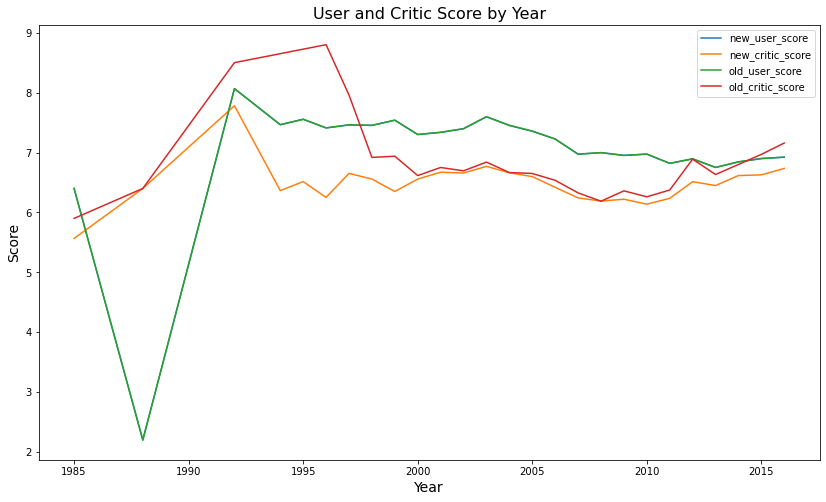

In [73]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year_of_release', y='user_score_clean', estimator=np.mean, ci=None)
sns.lineplot(data=df, x='year_of_release', y='critic_score_scaled', estimator=np.mean, ci=None)
sns.lineplot(data=old_df, x='year_of_release', y='user_score_clean', estimator=np.mean, ci=None)
sns.lineplot(data=old_df, x='year_of_release', y='critic_score_scaled', estimator=np.mean, ci=None)
plt.legend(['new_user_score', 'new_critic_score', 'old_user_score', 'old_critic_score'])
plt.title('User and Critic Score by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.show()

## Conclusion
- When averaged by year our new user score closely mirrors the old user score from which most of it was imputed which is why its not visiable on the chart
- Still our new columns follow the same path though the peaks are slightly softer 
- Our new column scores are around 0.5 lower on average however I'm satisfied they follow the same path particularly in more recent years

## Filling Rating Column
- We will fill the na with 'unkown' so we can perform correlation testing
- We could also create a numerical ordinal feature and perform numerical correlation tests 
- However while the ratings are ordinal the differences between each rating is not uniform / equi-distance

### Category to Category 

#### Entroy Coefficients

In [74]:
df['rating'].value_counts()

E       2987
T       2193
E10+    1081
M        977
Name: rating, dtype: int64

In [75]:
df['rating'].fillna('unknown', inplace=True)

In [76]:
def cramers_v(df, cat_cola, cat_colb):    
    crosstab = pd.crosstab(df[cat_cola], df[cat_colb])
    chi2 = stats.chi2_contingency(crosstab)[0]
    
    n = crosstab.sum().sum()
    phi2 = chi2/n
    r, k = crosstab.shape
    phi2corr = max(0, phi2-((k-1)*(r-1)) / (n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [77]:
lab = []
lab_2 = []
c_v = []

for label in df.select_dtypes(include='object'):
    for label_2 in df.select_dtypes(include='object'):
        if label != label_2:
            lab.append(label)
            lab_2.append(label_2)
            c_v.append(cramers_v(df, label, label_2))

data = pd.DataFrame({'column_1': lab, 'column_2': lab_2, 'score':c_v})

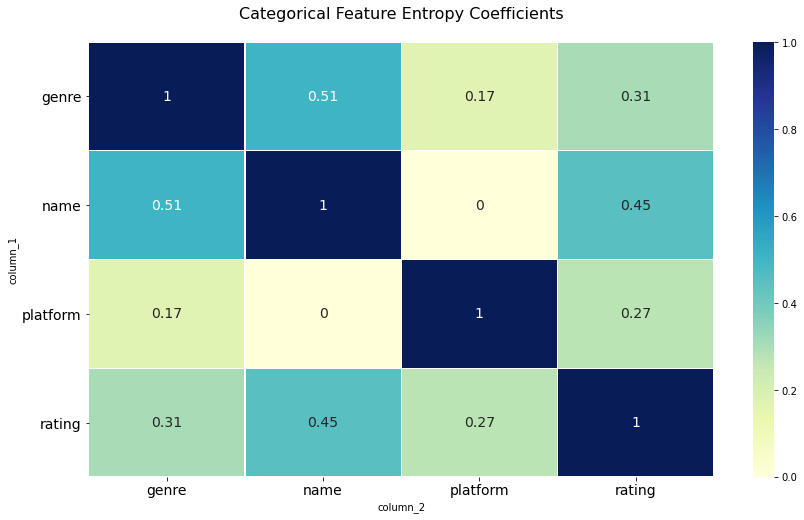

In [78]:
plt.figure(figsize=(14,8))
crosstab = pd.crosstab(data['column_1'], data['column_2'], values=data['score'], aggfunc='sum').fillna(1)
# matrix = np.triu(crosstab)
ax = sns.heatmap(crosstab, vmin=crosstab.values.min(), vmax=1, square=False, cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":14}) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.title("Categorical Feature Entropy Coefficients\n", fontsize=16)
plt.show()

### Chi X2 Category Label Ratios

In [79]:
# Crosstab for heat map and chi squared contingency 
def chi2(df, cat_cola, cat_colb, num):    
    labels = df[cat_colb].unique()
    lens = []
    crosstab = pd.crosstab(df[cat_cola], df[cat_colb])

    X, p , dof, contingency_table = stats.chi2_contingency(crosstab)

    textstr = f"Chi-squared test:\nX square: {X.round(3)}\np-value: {p.round(3)}\nDegree of Freedom: {dof}"
    
    plt.figure(figsize=(14,6))
    sns.heatmap(crosstab, annot=True, fmt='d',cmap='Blues')
    plt.title("Heatmap of "+cat_cola+" Ratio by "+cat_colb,  fontsize=16)
    plt.xlabel(cat_colb, fontsize=16)
    plt.ylabel(cat_cola, fontsize=16)
    plt.text(num, 3.5, textstr);
    
    

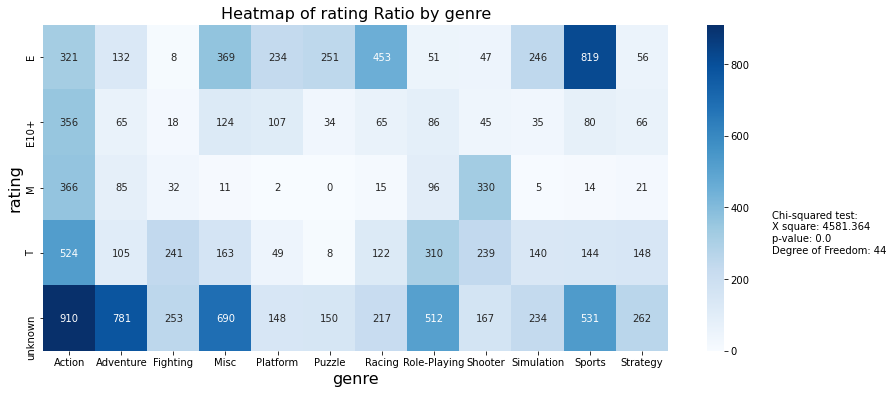

In [80]:
chi2(df, 'rating', 'genre', 14)

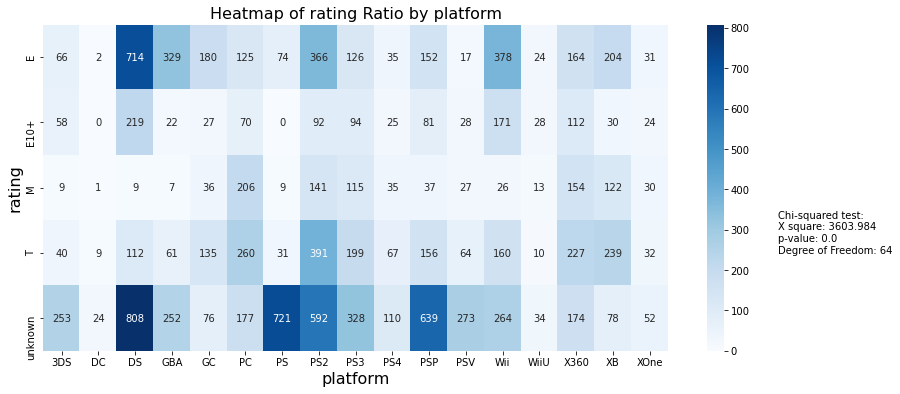

In [81]:
chi2(df, 'rating', 'platform', 20)

### Conclusion
- We can see name is highly correlated, interesting, but not of much use for use
- Rating and Platform are also correlated and we can use them for groupby fills

In [82]:
df.loc[df['rating'] == 'unknown', 'rating'] = np.nan
print('Number of missing rating values:', len(df[df['rating'].isna()]))

df['rating'] = df.groupby(['genre'], sort=False)['rating'].apply(lambda x: x.fillna(x.mode().iloc[0]))
print('Remaining missing rating values after fill:', df['rating'].isna().sum())


Number of missing rating values: 4855
Remaining missing rating values after fill: 0


In [83]:
df.isna().sum()

name                   0
platform               0
year_of_release        0
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
rating                 0
total_sales            0
user_score_clean       0
critic_score_scaled    0
dtype: int64

### No missing values left 

# Step 3. Analyze the data

## Purchase Count by Year/Platform
- Is the data for every period significant?

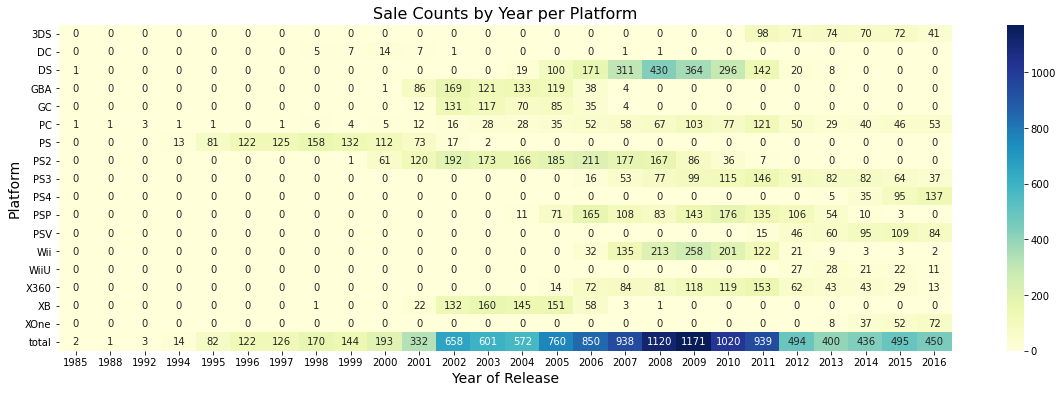

In [84]:
crosstab = pd.crosstab(df['platform'], df['year_of_release'])
market_share = round(crosstab / crosstab.sum(axis=0),2)
crosstab.loc['total'] = crosstab.sum()
plt.figure(figsize=(20,6))
sns.heatmap(crosstab, annot=True, cmap ='YlGnBu', fmt='g')
plt.title('Sale Counts by Year per Platform', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Platform', fontsize=14)
plt.show()

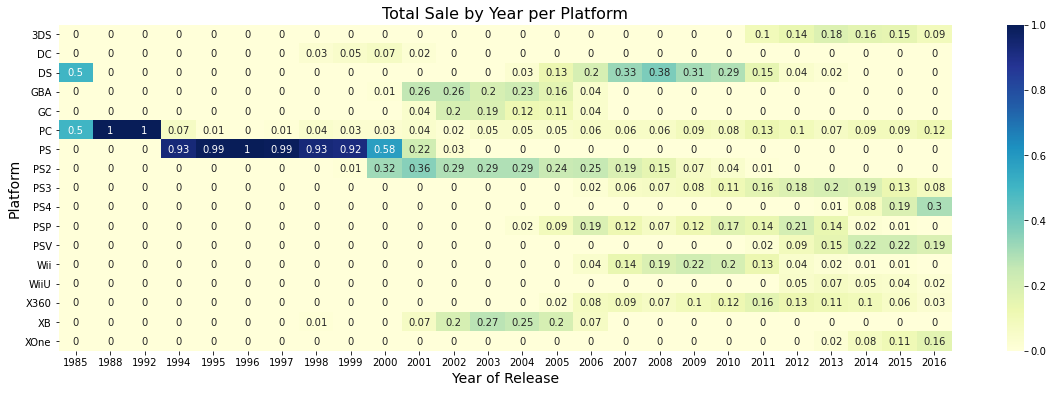

In [85]:
plt.figure(figsize=(20,6))
sns.heatmap(market_share, annot=True, cmap ='YlGnBu', fmt='g')
plt.title('Total Sale by Year per Platform', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Platform', fontsize=14)
plt.show()

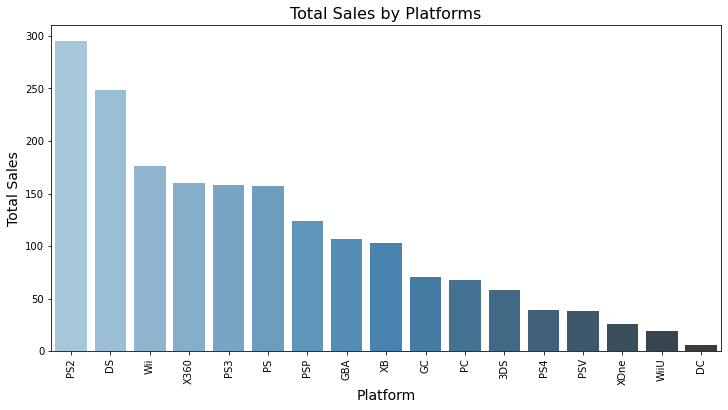

In [86]:
sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=sales.index, y=sales.values, palette="Blues_d" )
plt.title('Total Sales by Platforms', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [87]:
# outsales = outliers.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
# plt.figure(figsize=(12,6))
# sns.barplot(x=sales.index, y=sales.values, palette="Blues_d" )
# plt.xticks(rotation=90)
# plt.show()

### Conclusion
- A steady increase in purchase counts can be seen from 1995 but the most significant period is 2007-2011 
- The Nintendo DS account for over 1/3 of the market share during this sales boom and controlled over 50% of the market when the Wii sales counts are taken into account
- Worth noting that PS2 grossed the highest sales in both the original dataset and the trimmed version and upon review of the outlier dataset the Xbox and PS3 are some of the platforms negativly impacted by the removal sales outliers

## Top Platform Sales Distribution
- From the graph above we can see that PS2, DS, Wii, X360 are the top platforms from our trimmed dataset

In [88]:
top_platforms = df[df['platform'].str.contains('PS2|DS|Wii$|X360')]
platforms = ['PS2', 'DS', 'Wii', 'X360']

for p in platforms:
    print(top_platforms[top_platforms['platform'] == p]['year_of_release'].min())

1999
1985
2006
2005


In [89]:
top_platforms[(top_platforms['platform'] == 'DS')& (top_platforms['year_of_release'] < 2000)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,rating,total_sales,user_score_clean,critic_score_scaled
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,T,0.02,7.0,5.230769


- Looks like we have an incorrect entry can't find this online must be an error in the translation lets remove it

In [90]:
top_platforms = top_platforms[top_platforms['name'] != 'Strongest Tokyo University Shogi DS']

PS2


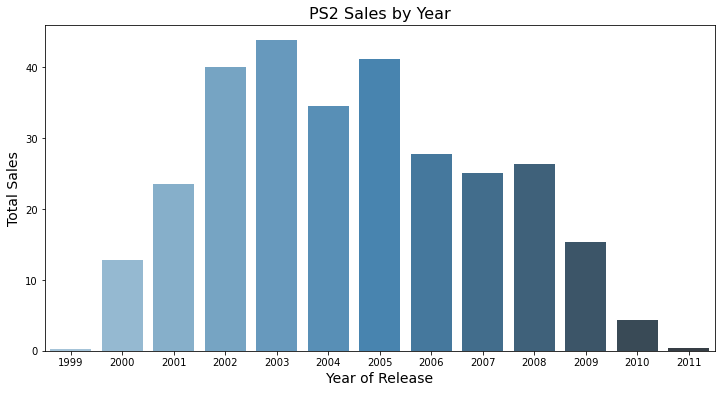

DS


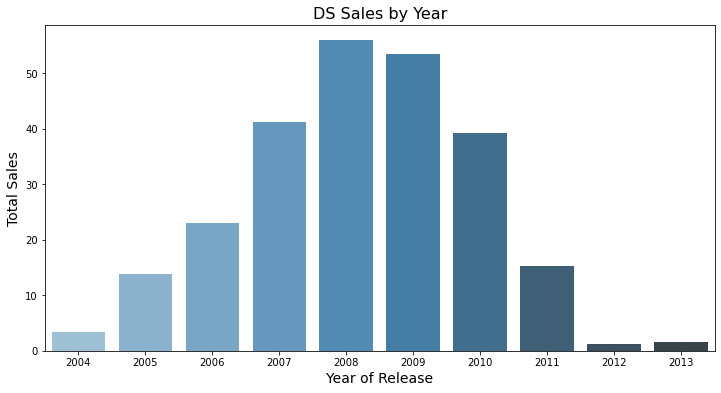

Wii


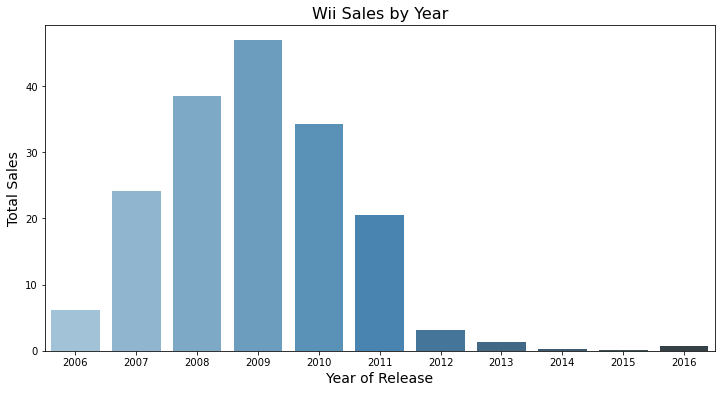

X360


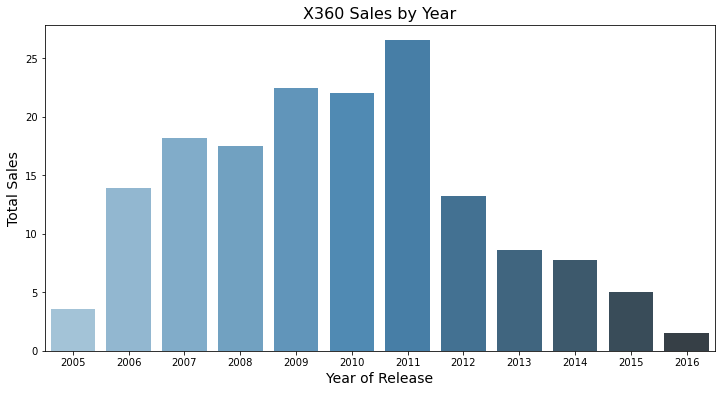

In [91]:
for p in platforms:
    plt.figure(figsize=(12,6))
    sns.barplot(data = top_platforms[top_platforms['platform'] == p],
                x='year_of_release',
                y='total_sales', 
                estimator = np.sum,
                palette = 'Blues_d',
                ci=None)
    plt.title(p+' Sales by Year', fontsize=16)
    plt.xlabel('Year of Release', fontsize=14)
    plt.ylabel('Total Sales', fontsize=14)
    print(p)
    plt.show()

## Conclusion
- We can see that 2012 was the worst year for all of the past giants of the gaming industry and by 2014 most sales are non existant
- Lets slice before and after 2014 to investigate past and present platforms and the average lifecycle of a platform
- We will also add a filter of at least 500 sales per console to ensure its not a one hit wonder in either pre or post 2014

## Past Popular Platforms That Have Faded

In [92]:
platforms_now = list(df[df['year_of_release'] == 2016]['platform'].unique())
# too few instances
platforms_now.remove('Wii')

platforms_then = list(df[df['year_of_release'] < 2016]['platform'].unique())

In [93]:
faded_platforms = list((set(platforms_now) | set(platforms_then)) - (set(platforms_now) & set(platforms_then)))
faded_platforms

['DC', 'GBA', 'XB', 'GC', 'PS', 'PS2', 'DS', 'Wii', 'PSP']

In [94]:
lifetimes = []
platforms = []

for platform in faded_platforms:
    year_min, year_max = df[df['platform'] == platform]['year_of_release'].agg(['min', 'max'])
    lifetimes.append(year_max - year_min)
    platforms.append(platform)
    
print(f'Average lifetime of past popular platforms - {(int(np.mean(lifetimes)))} years')
print(f'Longest lifetime - platform: {platforms[(lifetimes.index(np.max(lifetimes)))]} {(int(np.max(lifetimes)))} years')
print(f'Shortest lifetime - platform: {platforms[(lifetimes.index(np.min(lifetimes)))]} {(int(np.min(lifetimes)))} years')


Average lifetime of past popular platforms - 11 years
Longest lifetime - platform: DS 28 years
Shortest lifetime - platform: GC 6 years


### Conclusion
- Average life of 11 years 

## Building a Prognosis for 2017
- To build a prognosis for 2017 we wil filter data based on the release year of most popular console in 2016 the PS4 + 1 year

In [95]:
plat_group =df[df['year_of_release'] == 2016].groupby('platform') 
ps4 = df[df['platform'] == 'PS4']

print(plat_group['total_sales'].sum())

ps4['year_of_release'].min()

platform
3DS      4.55
PC       4.60
PS3      2.87
PS4     16.32
PSV      4.24
Wii      0.65
WiiU     1.89
X360     1.52
XOne     6.78
Name: total_sales, dtype: float64


2013

## Global Sales by Platform. 
- Are the differences in sales significant? 
- What about average sales on various platforms? 
- Describe your findings.


In [96]:
df_2014 = df[df['year_of_release'] >= 2014]
df_2014['platform'].unique()


array(['PS4', '3DS', 'WiiU', 'XOne', 'PC', 'X360', 'PS3', 'Wii', 'PSV',
       'PSP'], dtype=object)

          count  mean   std   min   25%   50%   75%   max    sum
platform                                                        
3DS       183.0  0.12  0.12  0.01  0.03  0.07  0.16  0.53  21.40
PC        139.0  0.11  0.13  0.01  0.02  0.05  0.15  0.53  15.07
PS3       183.0  0.12  0.12  0.01  0.03  0.08  0.16  0.51  22.44
PS4       267.0  0.14  0.13  0.01  0.04  0.08  0.21  0.54  37.42
PSP        13.0  0.03  0.03  0.01  0.01  0.02  0.02  0.09   0.36
PSV       288.0  0.06  0.07  0.01  0.02  0.04  0.09  0.41  18.50
Wii         8.0  0.13  0.15  0.01  0.02  0.10  0.18  0.47   1.07
WiiU       54.0  0.17  0.17  0.01  0.03  0.09  0.26  0.53   8.94
X360       85.0  0.17  0.15  0.01  0.05  0.10  0.27  0.53  14.33
XOne      161.0  0.15  0.14  0.01  0.03  0.11  0.22  0.53  23.71


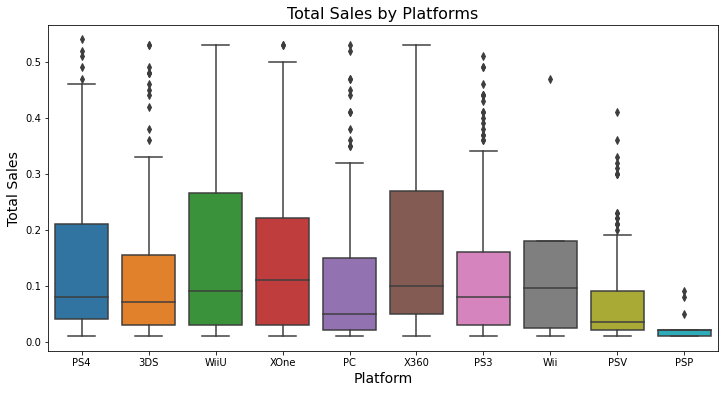

In [97]:
plt.figure(figsize=(12,6))

describe_2014 = df_2014.groupby('platform')['total_sales'].describe().round(2)
describe_2014['sum'] = df_2014.groupby('platform')['total_sales'].sum()
print(describe_2014)

sns.boxplot(data=df_2014, x='platform', y='total_sales')
plt.title('Total Sales by Platforms', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

## Conclusion
- Most platforms are highly right skewed with exception to Wii
- The WiiU has one of the highest average sales. However, while it does have one of the highest means and medians we canot say they have the most potential in 2017 as we have captured very few samples in 2016 and its total sales is one of the lowest for that year indicating that they are fading. 
- There only signifiant difference in average sales is from the PSV whos games average half that of other platforms however being a handheld with many cheaper and exlusive games and with the highest sales count its total sales sits comfortable around the 18.50M USD mark for the 3 year period
- There is a significant difference in total sales however with PS4 having 14M USD higher s=total sales over the same period
- All playstation models, the 3DS, and PC suffer from outliers which are driving their means higher than the median


- Before proceeding we will drop the Wii as they have few instances

In [98]:
df_2014 = df_2014[df_2014['platform'] != 'Wii']
df_2014 = df_2014[df_2014['platform'] != 'PSP']

## Critic Score Sales Impact
- Build a scatter plot and calculate the correlation between reviews and sales of the most popular platform from 2012
- Draw conclusions.

In [99]:
ps4_df = df_2014[df_2014['platform'] == 'PS4']

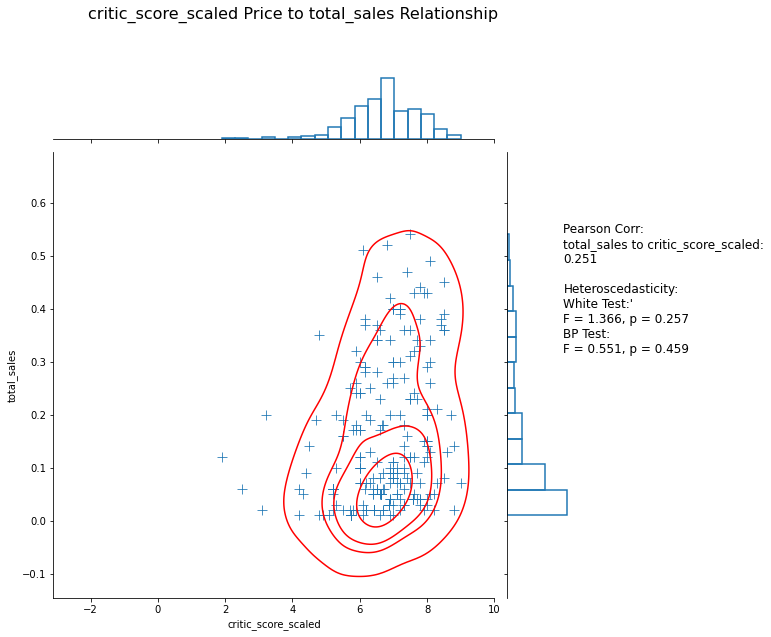

In [100]:
jplot(ps4_df, 'critic_score_scaled', 'total_sales')

### Conclusion
- Weak postive correlation of 0.25, however as pearsons corr and the graph is indicating a linear relationship all be it a diffuse one. 
- The relationship is not heteroscedastic however indicating an equadistance between points which are not overly concentraded in one area and not spreading out along an axis
- However given the high p-value this spread is likely due to random chance

## User Score Sales Impact

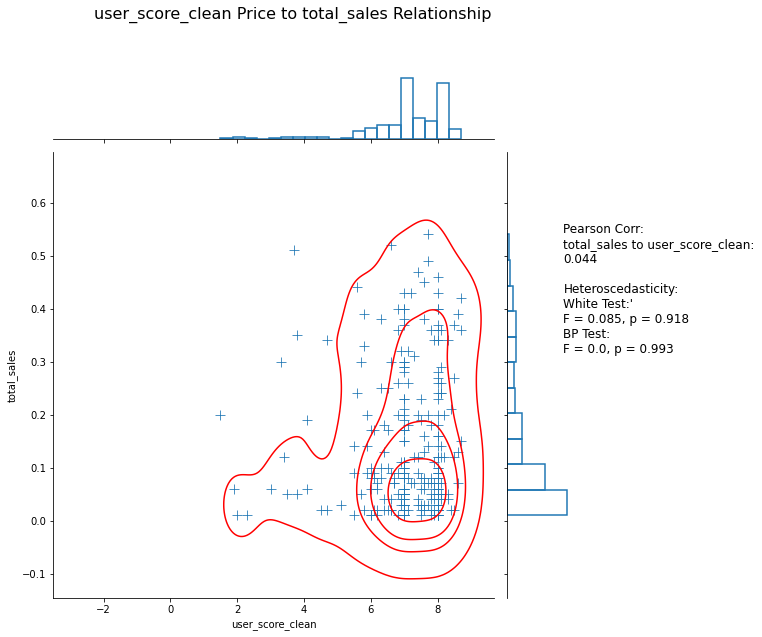

In [101]:
jplot(ps4_df, 'user_score_clean', 'total_sales')

### Conclusion
- A different story with user score with a very weak positive corrlation and low heteroscedasticity 
- Again given the high p-value this spread is likely due to random chance
- Critic score is a slightly more valuable of the two scores in terms of driving sales, though, neither have above a weak effect.

## Cross Platform Game Sales Comparison
- Compare the sales of the same games on other platforms.

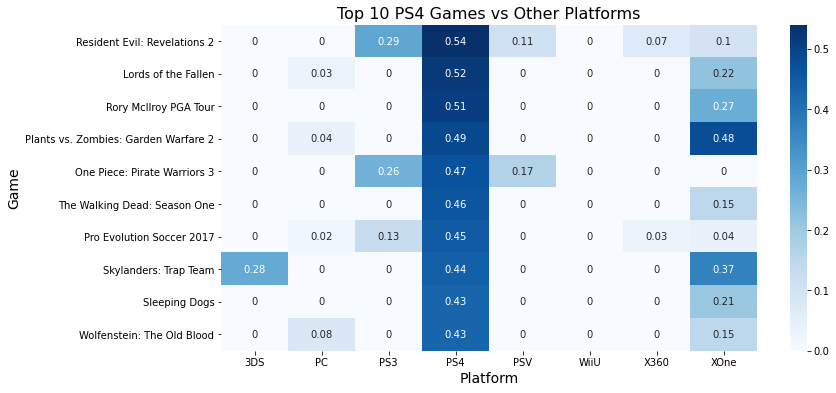

In [102]:
pivot_2014 = df_2014.pivot_table(index='name',
                   columns='platform',
                   values = 'total_sales')\
                   .fillna(0).sort_values(by='PS4', ascending=False).head(10)


plt.figure(figsize=(12,6))

sns.heatmap(pivot_2014, annot=True,cmap='Blues')
plt.title('Top 10 PS4 Games vs Other Platforms', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Game', fontsize=14)
plt.show()

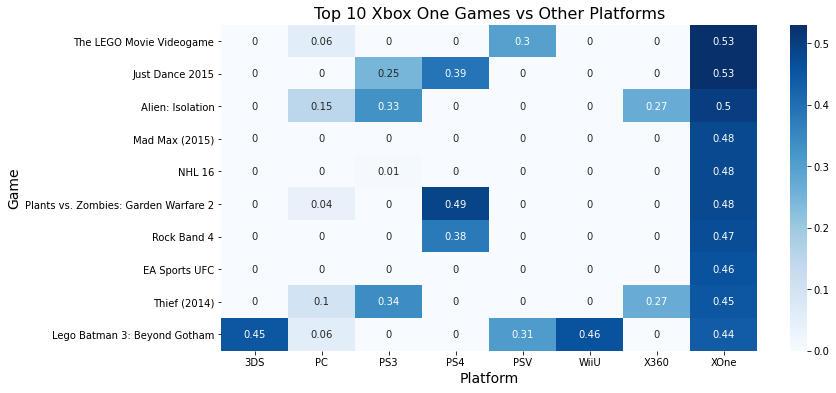

In [103]:
pivot_2014 = df_2014.pivot_table(index='name',
                   columns='platform',
                   values = 'total_sales')\
                   .fillna(0).sort_values(by='XOne', ascending=False).head(10)


plt.figure(figsize=(12,6))

sns.heatmap(pivot_2014, annot=True,cmap='Blues')
plt.title('Top 10 Xbox One Games vs Other Platforms', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Game', fontsize=14)
plt.show()

In [104]:
# pivot_2014 = df_2014.pivot_table(index='name',
#                    columns='platform',
#                    values = 'total_sales')\
#                    .fillna(0).sort_values(by='XOne', ascending=False).head(10)


# plt.figure(figsize=(12,6))

# sns.heatmap(pivot_2014, annot=True,cmap='Blues')
# plt.title('Top 10 Xbox One Games vs Other Platforms', fontsize=16)
# plt.xlabel('Platform', fontsize=14)
# plt.ylabel('Game', fontsize=14)
# plt.show()

### Conslusion
- It's apparent that while critic score is correlated and we see greater sales with higher scores the platform its self is key to overall sales
- Seen when we sort by PS4's cloest competitor Xbox One where those games have any purchase count cross platform the games consistently out sell on PS4
- Exclusivity of games available on limited platforms appears to be a significant competitive advantage in particular for Xbox 360 as in most instances the PS4 outperforms Xbox for cross platform games. Similar to what we saw above for the PSVs high sales count

## Games Sales by Genre
- What can we say about the most profitable genres? 
- Can you generalize about genres with high and low sales?

In [105]:
genre_2014 = df_2014.groupby('genre')['total_sales'].agg([
    'count', 'mean', 'median', 'sum']).sort_values(
    by='sum', ascending=False)

genre_2014['market_share'] = round(genre_2014['sum'] / genre_2014['sum'].sum(axis=0), 2)
genre_2014['user_score'] = round(df_2014.groupby('genre')['user_score_clean'].mean(), 2)
genre_2014['critic_score'] = round(df_2014.groupby('genre')['critic_score_scaled'].mean(), 2)

genre_2014

,count,mean,median,sum,market_share,user_score,critic_score
genre,,,,,,,
Action,517,0.116596,0.070,60.28,0.37,6.92,6.60
Role-Playing,178,0.124888,0.075,22.23,0.14,7.54,6.83
Sports,109,0.150459,0.100,16.40,0.10,5.55,6.39
Shooter,65,0.205846,0.180,13.38,0.08,6.68,6.79
Misc,93,0.124624,0.060,11.59,0.07,7.13,6.63
Adventure,173,0.060751,0.030,10.51,0.06,7.13,6.62
Fighting,52,0.144038,0.095,7.49,0.05,7.10,6.61
Racing,57,0.106667,0.060,6.08,0.04,6.33,6.81
Simulation,37,0.138919,0.100,5.14,0.03,6.85,6.77


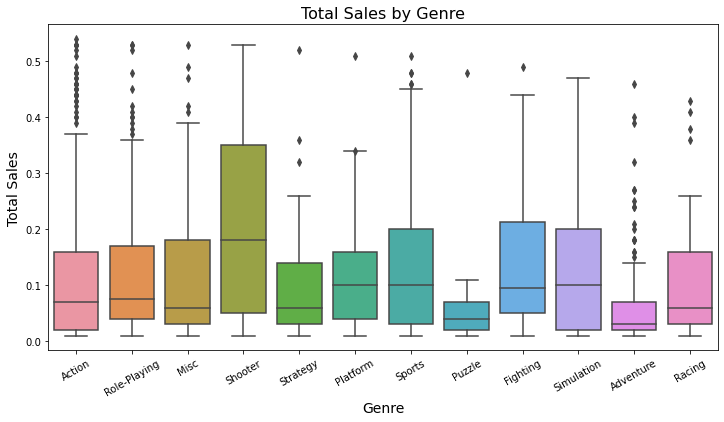

In [106]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_2014, x='genre', y='total_sales')
plt.title('Total Sales by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=30)
plt.show()

### Conclusion
- Action genre has accounted for over 1/3 of market share despite this genre grossing less on average than other top 5 genres the high volume of titles 4x greater number than Role-Playing the second highest grossing genre
- Role-Playing, Sport, and Shooter are the next highest grossing genre and range between 14-8% market share
- The top 5 genres have a similar average critic score however user scores for Role-Playing and Adventure games are higher than the other top 5 genres
- Adventure games have a high user score and count but the lowest average sales 50% lower than other genres, is actual game price a factor? - we cant assess that with this dataset.

- Before we proceed lets drop the puzzle genre as it only has few instances

# Step 4. Creating a user profile for each region
- For each region (NA, EU, JP), determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

In [107]:
def user_profile(df, cat_col, num_col):
    profile = df.groupby(cat_col)[num_col].describe().round(2).sort_values(
    by='max', ascending=True)
    profile['sum'] = df.groupby(cat_col)[num_col].sum()
    return profile

na_sales = user_profile(df_2014, 'platform', 'na_sales')
eu_sales = user_profile(df_2014, 'platform', 'eu_sales')
jp_sales = user_profile(df_2014, 'platform', 'jp_sales')
total_sales = user_profile(df_2014, 'platform', 'total_sales')

In [108]:
na_share = round(na_sales['sum'] / total_sales['sum'], 2)
eu_share = round(eu_sales['sum'] / total_sales['sum'], 2)
jp_share = round(jp_sales['sum'] / total_sales['sum'], 2)

In [109]:
market_share = pd.DataFrame(
    {'na_sales': na_share,
     'eu_sales': eu_share,
     'jp_sales': jp_share
    })
market_share['other_sales'] = (1 -market_share.loc[:,:].sum(axis=1))

In [111]:
market_share = market_share.transpose()

In [112]:
colors = sns.color_palette('pastel')

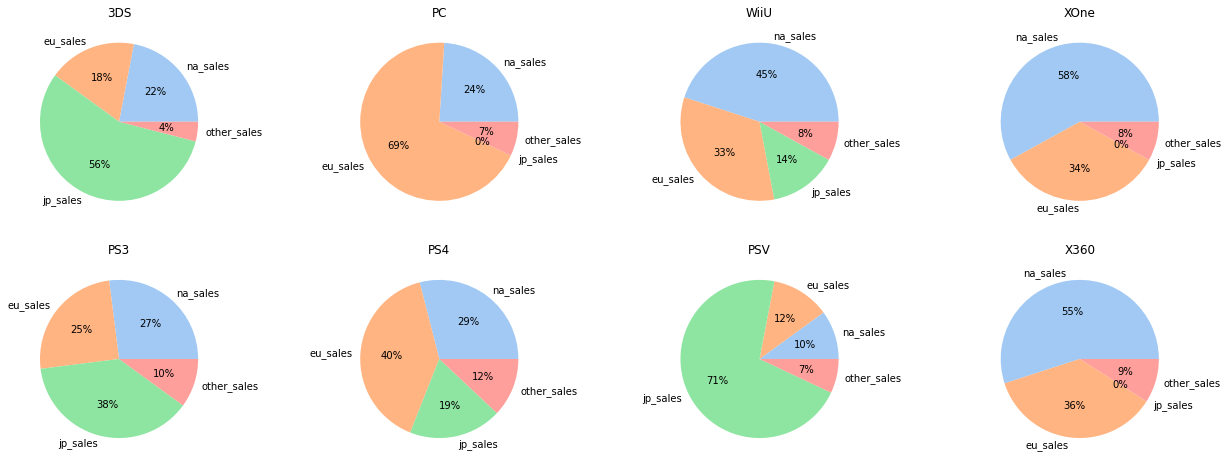

In [190]:
columns = market_share.columns

fig = plt.figure(figsize=(22,8)) #,dpi=1600)

def pieplots(df, n1, n2, n3, n4, c):
    ax1 = plt.subplot2grid((n1, n2),(n3, n4))
    plt.pie(df[c], labels=df.index, colors=colors,autopct='%.0f%%')
    plt.title(c)

pieplots(market_share, 2, 4, 0, 0, columns[0])
pieplots(market_share, 2, 4, 0, 1, columns[1])
pieplots(market_share, 2, 4, 1, 0, columns[2])
pieplots(market_share, 2, 4, 1, 1, columns[3])
pieplots(market_share, 2, 4, 1, 2, columns[4])
pieplots(market_share, 2, 4, 0, 2, columns[5])
pieplots(market_share, 2, 4, 1, 3, columns[6])
pieplots(market_share, 2, 4, 0, 3, columns[7])

### Conclusion
- North American market accounts for over 50% of both Xbox models. The Wiiu is also popular from 2014-2016 with 45%. All other cosoles hover around 25% with exception to PSV with only 10%

- The European market account for 69% of PC game sales from the same period. Followed by the PS4 and Xbox model between 35-40%. Again handheld devices performed poorly in Europe

- The Japanese market is were handheld devices are popular with the PSV and 3DS holding 71% and 55% of the market share for these devices games. Xbox on PC games have 0 sales in this region between 2014-2016, at least as far as the data in this trimmed dataset contains

In [114]:
na_genres = user_profile(df_2014, 'genre', 'na_sales')
eu_genres = user_profile(df_2014, 'genre', 'eu_sales')
jp_genres = user_profile(df_2014, 'genre', 'jp_sales')
total_genres = user_profile(df_2014, 'genre', 'total_sales')

In [115]:
na_genre_share = round(na_genres['sum'] / total_genres['sum'], 2)
eu_genre_share = round(eu_genres['sum'] / total_genres['sum'], 2)
jp_genre_share = round(jp_genres['sum'] / total_genres['sum'], 2)

In [116]:
genre_share = pd.DataFrame(
    {'na_sales': na_genre_share,
     'eu_sales': eu_genre_share,
     'jp_sales': jp_genre_share
    })
genre_share['other_sales'] = (1 -genre_share.loc[:,:].sum(axis=1))

In [117]:
genre_share = genre_share.transpose()
genre_share

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
na_sales,0.32,0.29,0.32,0.41,0.43,0.12,0.25,0.25,0.42,0.19,0.40,0.25
eu_sales,0.33,0.29,0.23,0.21,0.36,0.14,0.59,0.20,0.45,0.55,0.37,0.45
jp_sales,0.27,0.33,0.35,0.29,0.09,0.73,0.05,0.48,0.02,0.17,0.13,0.24
other_sales,0.08,0.09,0.10,0.09,0.12,0.01,0.11,0.07,0.11,0.09,0.10,0.06


In [143]:
genre_share.index

Index(['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], dtype='object')

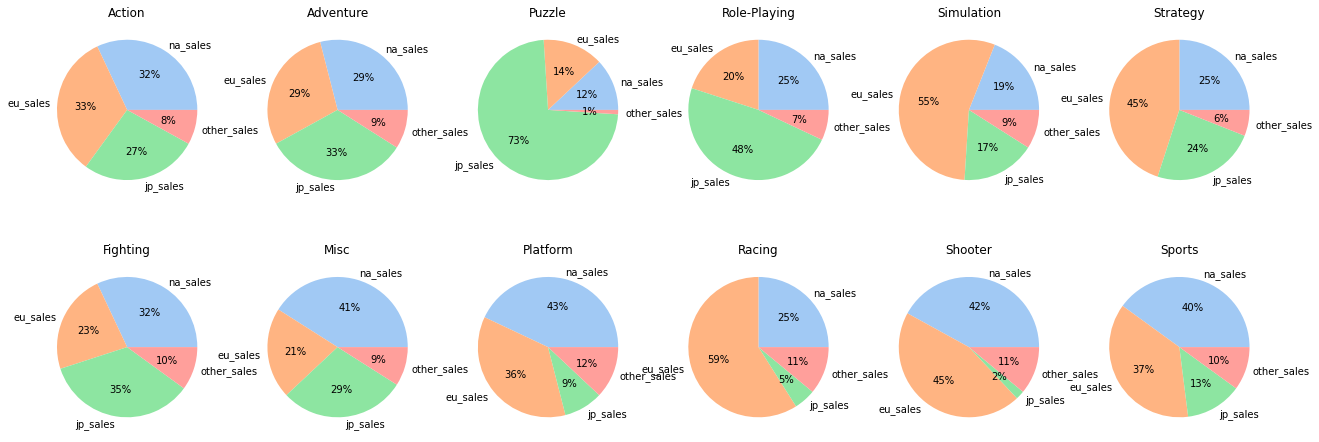

In [189]:
fig = plt.figure(figsize=(22,8)) #,dpi=1600)


pieplots(genre_share, 2, 6, 0, 0, 'Action')
pieplots(genre_share, 2, 6, 0, 1, 'Adventure')
pieplots(genre_share, 2, 6, 1, 0, 'Fighting')
pieplots(genre_share, 2, 6, 1, 1, 'Misc')
pieplots(genre_share, 2, 6, 1, 2, 'Platform')
pieplots(genre_share, 2, 6, 0, 2, 'Puzzle')
pieplots(genre_share, 2, 6, 1, 3, 'Racing')
pieplots(genre_share, 2, 6, 0, 3, 'Role-Playing')
pieplots(genre_share, 2, 6, 1, 4, 'Shooter')
pieplots(genre_share, 2, 6, 0, 4, 'Simulation')
pieplots(genre_share, 2, 6, 1, 5, 'Sports')
pieplots(genre_share, 2, 6, 0, 5, 'Strategy')

### Conclusion
- North American market favors Platform, Sport, and Shooter genres holding between 43%-40% each of regional market share among those genres with Puzzle and Simulation being the weakest performers

- European market favors Racing, Simulation are the top genres holding 55% and 59% of regional market share among those genres respectivly while Role Playing, Misc are the weakest performers

- Japanese market favors Role-Playing is the most popular genre in Japan accounting for 48% of that genres market share, Shooter and Platform are the weakest performers

In [192]:
na_rating = user_profile(df_2014, 'rating', 'na_sales')
eu_rating = user_profile(df_2014, 'rating', 'eu_sales')
jp_rating = user_profile(df_2014, 'rating', 'jp_sales')
total_rating = user_profile(df_2014, 'rating', 'total_sales')

In [193]:
na_rating_share = round(na_rating['sum'] / total_rating['sum'], 2)
eu_rating_share = round(eu_rating['sum'] / total_rating['sum'], 2)
jp_rating_share = round(jp_rating['sum'] / total_rating['sum'], 2)

In [194]:
total_rating['sum']

rating
E       36.07
E10+    27.78
T       71.18
M       26.78
Name: sum, dtype: float64

In [195]:
rating_share = pd.DataFrame(
    {'na_sales': na_rating_share,
     'eu_sales': eu_rating_share,
     'jp_sales': jp_rating_share
    })
rating_share['other_sales'] = (1 -rating_share.loc[:,:].sum(axis=1))

In [196]:
rating_share = rating_share.transpose()

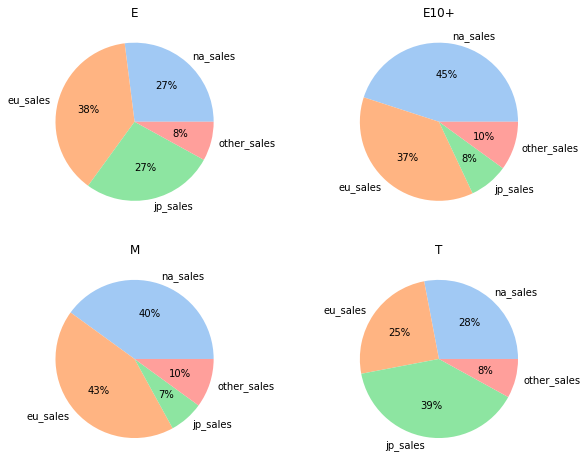

In [199]:
fig = plt.figure(figsize=(10,8)) #,dpi=1600)
columns = rating_share.columns

pieplots(rating_share, 2, 2, 0, 0, columns[0])
pieplots(rating_share, 2, 2, 0, 1, columns[1])
pieplots(rating_share, 2, 2, 1, 0, columns[2])
pieplots(rating_share, 2, 2, 1, 1, columns[3])

### Conclusion
- North American market favor slightly more mature content with E10+ followed by M being the most popular 

- European market favor more mixed content with both M and E holding the highest share among this rating

- Japanese market favors younger content with Japan accounting almost 40% of the market share of this genere

### Conclusion 
North American Profile

- North American market accounts for over 50% of both Xbox models. The Wiiu is also popular from 2014-2016 with 45%. All other cosoles hover around 25% with exception to PSV with only 10%.
- Platform, Sport, and Shooter genres holding between 43%-40% each of regional market share among those genres with Puzzle and Simulation being the weakest performers
- North American market favor slightly more mature content with E10+ followed by M being the most popular 

European Profile

- The European market account for 69% of PC game sales from the same period. Followed by the PS4 and Xbox model between 35-40%. Again handheld devices performed poorly in Europe
- Racing, Simulation are the top genres holding 55% and 59% of regional market share among those genres respectivly while Role Playing, Misc are the weakest performers
- European market favor more mixed content with both M and E holding the highest share among this rating

Japanese Profile

- The Japanese market is were handheld devices are popular with the PSV and 3DS holding 71% and 55% of the market share for these devices games. Xbox on PC games have 0 sales in this region between 2014-2016, at least as far as the data in this trimmed dataset contains
- Role-Playing is the most popular genre in Japan accounting for 48% of that genres market share, Shooter and Platform are the weakest performers
- Japanese market favors younger content with Japan accounting almost 40% of the market share of this genere

# Step 5. Testing Hypothesis
## Average user ratings of the Xbox One and PC platforms are the same
- H0: no difference between average platform ratings
- H1: there is a difference between average platform ratings
- Two tailed we are looking for any difference

In [ ]:
xone_pc = df_2014[df_2014['platform'].str.contains('XOne|PC')]

xone_user_ratings = xone_pc[xone_pc['platform'] == 'XOne']['user_score_clean']
pc_user_ratings =  xone_pc[xone_pc['platform'] == 'PC']['user_score_clean']




print('XOne Sales Var:', round(xone_user_ratings.std(), 3), 
      'PC Sales Var:', round(pc_user_ratings.std(), 3), '\n')

t, p = stats.ttest_ind(xone_user_ratings,
                       pc_user_ratings,
                       equal_var = True)

alpha = 0.05 / 2

print('T-statistic:', round(t, 3), '\n')
print('P-value:', round(p, 3), 'Alpha:', round(alpha,3), '\n')
if p > alpha:
    print('We cannot reject the null hyptheses\n')
else:
    print('we reject the null hypotheses')
    
plt.figure(figsize=(12,6))
sns.boxplot(data = xone_pc, x ='platform', y='user_score_clean')
plt.xlabel('User Score', fontsize=14)
plt.ylabel('Platform', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Xbox One & PC User Score Distribution', fontsize=16)
plt.show()

### Conclusion
- Slight differences between distributions with Xbox One having a much more normal distribution versus PC's long tail indicating a left skew
- While the difference is clear we cannot reject the null hypothesis as this sample distribution is highly likely to have occured through random chance and this outcome is not repeatable/unlikely to occur from another sample

## Average user ratings for the Action and Sports genres are different. 
- H0: no difference between average genre ratings
- H1: there is a difference between average genre ratings
- Two tailed we are looking for any difference

In [ ]:
action_sport = df_2014[df_2014['genre'].str.contains('Action|Sport')]

action_user_ratings = action_sport[action_sport['platform'] == 'XOne']['user_score_clean']
sport_user_ratings =  action_sport[action_sport['platform'] == 'PC']['user_score_clean']




print('Action Sales Var:', round(action_user_ratings.std(), 3), 
      'Sport Sales Var:', round(sport_user_ratings.std(), 3), '\n')

t, p = stats.ttest_ind(action_user_ratings,
                       sport_user_ratings,
                       equal_var = True)

alpha = 0.05 / 2

print('T-statistic:', round(t, 3), '\n')
print('P-value:', round(p, 3), 'Alpha:', round(alpha,3), '\n')
if p > alpha:
    print('We cannot reject the null hyptheses\n')
else:
    print('we reject the null hypotheses')
    
plt.figure(figsize=(12,6))
sns.boxplot(data = action_sport, x ='genre', y='user_score_clean')
plt.xlabel('User Score', fontsize=14)
plt.ylabel('Platform', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Action & Sport Genre User Score Distribution', fontsize=16)
plt.show()
plt.show()

### Conclusion
- We see a statistically significant difference between the user ratings of Action and Sport with Action being rated higher
- With the p-value being hgiher than our alpha threshold we cannot reject the null hypothesis however this could be resample with a different subset

# Overall Conclusions

**Step 1. Data Investigation**

- year_of_release should be integer
- Critic score should be scaled to between 1-10 and thus remain a float for easier comparison with user score
- user_score should be converted from object to float
- NA values in discovered in name, genre, year_of_release, critic_score, user_score, rating
- To Be Decided (tbd) values in user_score needs to be explained and addressed
- Major skewness in year_of_release and sales columns need to be addressed

**Step 2. Explaining Missing Values**

User and Critic Scores
- Most consoles which don't have a review were released pre 2000 when the interest was not as we know it today. Thus any review for these console post 2000 like the ones we saw for DC (Dream Cast) would have been done in retrospect
- We will mostly likely be dropping data where the release year is less than say 2010 but regardless we will use whatever data we can to help impute accurate average missing reviews as the score are much the same until pre 1990

Rating
- Correlation between a games having a rating and its price/popularity with less sales for those who have no rating values
- A few of the games have only been released in 2016 and were probably upcoming during the scraping
- After investigation its seems that these games are some of the more underperforming titles with less than 150K USD in total sales
- I would propose that most likely the ratings are not present due to the aforementioned future release date of the game when the data was collected and also lack of popularity among some. 
- I would also propose that the data sourcing itself is the reason for so many  this type of NA would be especially prevalent as this dataset was scraped https://www.vgchartz.com/gamedb/

**Step 3. Preprocessing Data**

Release Year
- We salvaged 25 accurate release years by parsing the year from the title
- Dropped the rest the rest as its very little of the total data
- Converted column to integer as year_of_release is a discrete value in this dataframe

Total Sales
- Severely skewed and removed ~3000 outliers
- Note I investigated the averages across the years with both the outlier and trimmed datasets and the downward trend was reflected in both though more apparent now so I decided to proceed as its still an accurate representation of the current market

User and Critic Scores
- We investigated the skew of these columns to determine if we should trim them and did not remove outliers as lower scores could be important for later investigation and hypothesis testing
- We also investigated numerical and categorical correlations between these columns and the rest of the dataset in order to under how best to try and fill the NA and TBD values
- Interesting that critic score is now higher on average than user score and for the first time since 1998

User Score Fill
- Critic score, genre, and platform have the strongest effect on user score and we used the categorical features to create a groupby fill using mean

Critic Score Fill
- Total Sales, Genre, and Platform had the highest correlation to our scaled  Critic score and we used median for this groupby as the column has a slight left skew
- We managed to fill a lot of the values and we dropped the remaining na values which were also missing year of release values as they correspond to pre 2010 and pre widespread internet

Overall Note
- Given more time I would prefer to use a random forest to predict the rating based on critic score, platform, and rating but this will suffice for now
- We will also investigate how our filled dataset compares to the original at some points during later investigation
- I would prefer to use RFC to predict these ratings but I dont have the time and its beyond the scope of this stager of the course
- When averaged by year our new user score closely mirrors the old user score from which most of it was imputed which is why its not visible on the chart
- Still our new columns follow the same path though the peaks are slightly softer 

Final Thoughts On Scores Fill
- Our new column scores are around 0.5 lower on average however I'm satisfied they follow the same path particularly in more recent years

Ratings Fill
- We used only the highly correlated genres column to create a group by fill for these missing values as adding any additional feature created to many subgroups to fill the missing values appropriately 

**Step 4. Analyzing the data**

Purchase Count by Year/Platform
- A steady increase in purchase counts can be seen from 1995 but the most significant period is 2007-2011 
- The Nintendo DS account for over 1/3 of the market share during this sales boom and controlled over 50% of the market when the Wii sales counts are taken into account
- Worth noting that PS2 grossed the highest sales in both the original dataset and the trimmed version and upon review of the outlier dataset the Xbox and PS3 are some of the platforms negatively impacted by the removal sales outliers

Top Platform Sales Distribution
- We saw that 2012 was the worst year for all of the past giants of the gaming industry and by 2014 most sales are non existent
- Lets slice before and after 2014 to investigate past and present platforms and the average lifecycle of a platform
- We will also add a filter of at least 500 sales per console to ensure its not a one hit wonder in either pre or post 2014

Past Popular Platforms That Have Faded
- Average life of 13 years seems long lets check with some of the more popular platforms Xbox and Playstation
- I believe this is correct as we saw the fading and emerging of Playstation and Xbox consoles each in around 10-12 years
- Going forward to capture only the most relevant generation of consoles we will took data from 2010 but also remove PS2 so we only have at most 2 generation of the same platform in the dataset

Building a Prognosis for 2017
- Based on the graphs and lifetime figures above we should take from 2004 to capture the average lifetime however we could push it forward to capture the death of the second last generation and the emergence of the most recent generation of consoles in this dataset which would include PS4, Wii, etc...somewhere around 2010
- We plotted the lifestyles of the most popular platforms Playstation and Xbox and saw if 2010 captures the peak/dip of the previous generation and the emergence of the most recent

Global Sales by Platform
- The biggest difference is sales is between handheld and Home consoles with the PSV, PSP, DS, and 3DS having the lowest sales overall along with PC
- All distributions are right skewed with the all the platforms listed above severely skewed
- We can saw that PSV and PSP have strong variation in game price which could be partially the cause for sthere skews
- https://www.pricecharting.com/

**Step 5. 2017 Prognosis**
- To build a prognosis for 2017 we wil capture only the previous year 2016 and investigate

Global Sales by Platform
- Most platforms are highly right skewed with exception to Wii and Wiiu
- The Wii and WiiU have the highest average sales. However, while they do have the highest means and medians we cannot say they have the most potential in 2017 as we have captured very few samples in 2016 and their total sales are the lowest for that year indicating that they are fading. 
- There is not a significant difference in average sales (excluding Wii) between platforms
- There is a significant difference in total sales however with PS4 more than double its the competitor Xbox One which 
- PC, PSV, and 3DS also remain competitive with far higher purchase counts and total sales than all other platforms (excluding the afforemention PS4 and XOne)
- The PSV also has the highest outlier count which is pulling its mean and total sales higher
- Before proceeding we will drop the Wii as it only has two instances

Critic Score Sales Impact
- Moderate positive correlation of 0.34, however as pearsons corr and the graph is indicating a linear relationship albeit a diffuse one. 
- The relationship is not heteroscedastic however indicating an equal distance between points which are not overly concentrated in one area and not spreading out along an axis

User Score Sales Impact
- A similar story with user score though with a weaker positive correlation, in this case a slightly higher heteroscedasticity score is visible on the graph in that there is a tiger cluster of high scores with lower total sales than critic score and as a linear regression would be affected by and may not capture either the cluster correctly and/or the lower score outliers
- Critic score is a slightly more valuable of the two scores in terms of driving sales however its clear both scores have an effect on sales

Cross Platform Game Sales
- It's apparent that while critic score is correlated and we see greater sales with higher scores the platform itself is key to overall sales
- Seen when we sort by PS4's closest competitor Xbox One where those games have any purchase count cross platform the games consistently out sell on PS4
- Exclusivity of games available on limited platforms appears to be a significant competitive advantage

Games Sales by Genre
- Action genre has accounted for almost 1/3 of market share, being cheaper on average than its closest competitors may influence sales
- Role-Playing, Sport, and Shooter game are all very even in terms of count and market share around 1/2 that of Action
- The top 5 genres have a similar critic score however user scores for Role-Playing and Adventure games are more popular with users than the other top 5 genres, also with Adventure games also being cheaper they have a higher purchase count, than Role-Playing, Sport, and Shooter 
- Before we proceed lets drop the puzzle genre as it only has one instance

**Step 6. Regional Profiles**

North American Profile

- North American market accounts for over 50% of both Xbox models. The Wiiu is also popular from 2014-2016 with 45%. All other cosoles hover around 25% with exception to PSV with only 10%.
- Platform, Sport, and Shooter genres holding between 43%-40% each of regional market share among those genres with Puzzle and Simulation being the weakest performers
- North American market favor slightly more mature content with E10+ followed by M being the most popular 

European Profile

- The European market account for 69% of PC game sales from the same period. Followed by the PS4 and Xbox model between 35-40%. Again handheld devices performed poorly in Europe
- Racing, Simulation are the top genres holding 55% and 59% of regional market share among those genres respectivly while Role Playing, Misc are the weakest performers
- European market favor more mixed content with both M and E holding the highest share among this rating

Japanese Profile

- The Japanese market is were handheld devices are popular with the PSV and 3DS holding 71% and 55% of the market share for these devices games. Xbox on PC games have 0 sales in this region between 2014-2016, at least as far as the data in this trimmed dataset contains
- Role-Playing is the most popular genre in Japan accounting for 48% of that genres market share, Shooter and Platform are the weakest performers
- Japanese market favors younger content with Japan accounting almost 40% of the market share of this genere

**Step 7. Testing Hypothesis**

Average user ratings of the Xbox One and PC platforms are the same
- Slight differences between distributions with Xbox One having a much more normal distribution versus PC's long tail indicating a left skew
- While the difference is clear we cannot reject the null hypothesis as this sample distribution is highly likely to have occurred through random chance and this outcome is not repeatable/unlikely to occur from another sample

Average user ratings for the Action and Sports genres are different. 
- We see a statistically significant difference between the user ratings of Action and Sport with Action being rated higher
- With the p-value being hgiher than our alpha threshold we cannot reject the null hypothesis however this could be resample with a different subset

